# Inerpretation-Net

## Specification of Experiment Settings

In [1]:
'''
Anpassen: 

number_of_variables --> anzahl variablen

lambda_dataset_size --> datensatz größe für training von lambda-nets
number_of_generated_datasets and  number_of_trained_lambda_nets and interpretation_dataset_size --> anzahl der lambda-nets

lambda net --> alles wie in notebook 2

i net -->
'''

'\nAnpassen: \n\nnumber_of_variables --> anzahl variablen\n\nlambda_dataset_size --> datensatz größe für training von lambda-nets\nnumber_of_generated_datasets and  number_of_trained_lambda_nets and interpretation_dataset_size --> anzahl der lambda-nets\n\nlambda net --> alles wie in notebook 2\n\ni net -->\n'

In [2]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 3,
        'beta': 1,
        'decision_sparsity': 1,
        'fully_grown': True,    
        'dt_type': 'vanilla', #'SDT', 'vanilla'
    },
    'data': {
        'number_of_variables': 10, 
        'num_classes': 2,
        'categorical_indices': [],
        
        'use_distribution_list': True,
        'random_parameters_distribution': True, ##MAKEPATH DIFFERENT FILES
        'max_distributions_per_class': 1, # None; 0; int >= 1  
        'exclude_linearly_seperable': False,
        'data_generation_filtering': False,
        'fixed_class_probability': False,
        'balanced_data': False,
        'weighted_data_generation': False,
        'shift_distrib': False,
        
        'dt_type_train': 'vanilla', # (None, 'vanilla', 'SDT')
        'maximum_depth_train': 3, #None or int
        'decision_sparsity_train': 1, #None or int
        
        'function_generation_type': 'make_classification',# 'make_classification_distribution', 'make_classification_distribution_trained', 'distribution', 'distribution_trained', 'make_classification', 'make_classification_trained', 'random_decision_tree', 'random_decision_tree_trained'
        'distrib_by_feature': True,
        'distribution_list': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'gamma', 'poisson', 'exponential', 'weibull'],#['uniform', 'normal', 'gamma', 'exponential', 'beta', 'binomial', 'poisson'], 
        'distribution_list_eval': ['uniform', 'normal', 'gamma', 'beta', 'poisson'],#['uniform', 'gamma', 'poisson', 'exponential', 'weibull'],#['uniform', 'normal', 'gamma', 'beta', 'poisson'],
        
        'objective': 'classification', # 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
                
        'lambda_dataset_size': 5000, #number of samples per function
        'number_of_generated_datasets': 100,
        
        'noise_injected_level': 0, 
        'noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'
        
        'data_noise': 0, #None or float
        
        'distrib_param_max': 5,
    }, 
    'lambda_net': {
        'epochs_lambda': 1000,
        'early_stopping_lambda': True, 
        'early_stopping_min_delta_lambda': 1e-3,
        'restore_best_weights': True,
        'patience_lambda': 50,
        
        'batch_lambda': 64,
        'dropout_lambda': 0,
        'lambda_network_layers': [128],
        'use_batchnorm_lambda': False,
        
        'optimizer_lambda': 'adam',
        'loss_lambda': 'binary_crossentropy', #categorical_crossentropy
        
        'number_of_lambda_weights': None,
        
        'number_initializations_lambda': 1, 
        
        'number_of_trained_lambda_nets': 100,
    },     
    
    'i_net': {
        #'dense_layers': [1024, 1024, 256, 2048, 2048],
        'dense_layers': [1792, 512, 512],
        #'dense_layers': [1792, 512, 512],
        
        #'dropout': [0, 0, 0, 0, 0.3],#[0.3, 0.3, 0.3, 0.3, 0.3],
        'dropout': [0, 0, 0.5],
        #'dropout': [0, 0, 0.5],

        #'hidden_activation': 'relu',
        'hidden_activation': 'sigmoid',
        #'hidden_activation': 'swish',

        #'optimizer': 'rmsprop', 
        'optimizer': 'adam', 
        #'optimizer': 'adam', 
        
        #'learning_rate': 0.001,
        'learning_rate': 0.001,
        #'learning_rate': 0.001, 
        
        'separate_weight_bias': False,
        
        'convolution_layers': None,
        'lstm_layers': None,        
        'additional_hidden': False,
        
        'loss': 'binary_crossentropy', #mse; binary_crossentropy; 'binary_accuracy'
        'metrics': ['binary_accuracy'], #soft_ or _penalized
        
        'epochs': 500, 
        'early_stopping': True,
        'batch_size': 256,

        'interpretation_dataset_size': 100,
                
        'test_size': 5, #Float for fraction, Int for number 0
        'evaluate_distribution': True,
        'force_evaluate_real_world': False,
        
        'function_representation_type': 5, # 1=standard representation; 2=sparse representation with classification for variables; 3=softmax to select classes (n top probabilities)
        'normalize_lambda_nets': False,

        'optimize_decision_function': True, #False
        'function_value_loss': False, #False
                      
        'data_reshape_version': None, #default to 2 options:(None, 0,1 2,3) #3=autoencoder dimensionality reduction
        
        'resampling_strategy': None,#'ADASYN', #'SMOTE', None
        'resampling_threshold': 0.25,#0.2,
        
        'nas': False,
        'nas_type': 'SEQUENTIAL', #options:(None, 'SEQUENTIAL', 'CNN', 'LSTM', 'CNN-LSTM', 'CNN-LSTM-parallel')      
        'nas_trials': 60,
        'nas_optimizer': 'greedy' #'hyperband',#"bayesian",'greedy', 'random'
    },    
    
    'evaluation': {   
        #'inet_holdout_seed_evaluation': False,
        
        'number_of_random_evaluations_per_distribution': 10,
        'random_evaluation_dataset_size_per_distribution': 10_000, 
        'optimize_sampling': True,
            
        'random_evaluation_dataset_size': 500, 
        'random_evaluation_dataset_distribution': 'uniform', 
        
        'per_network_optimization_dataset_size': 5000,

        #'sklearn_dt_benchmark': False,
        #'sdt_benchmark': False,
        
        'different_eval_data': False,
        
        'eval_data_description': {
            ######### data #########
            'eval_data_function_generation_type': 'make_classification',
            'eval_data_lambda_dataset_size': 5000, #number of samples per function
            'eval_data_noise_injected_level': 0, 
            'eval_data_noise_injected_type': 'flip_percentage', # '' 'normal' 'uniform' 'normal_range' 'uniform_range'     
            ######### lambda_net #########
            'eval_data_number_of_trained_lambda_nets': 100,
            ######### i_net #########
            'eval_data_interpretation_dataset_size': 100,
        }
        
    },    
    
    'computation':{
        'load_model': False,
        'n_jobs': 15,
        'use_gpu': False,
        'gpu_numbers': '2',
        'RANDOM_SEED': 42,   
        'verbosity': 0
    }
}


### Imports

In [3]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [4]:
#######################################################################################################################################
##################################################### IMPORT LIBRARIES ################################################################
#######################################################################################################################################
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import logging

import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)

from itertools import product       
from tqdm.notebook import tqdm
import pickle
import numpy as np
import pandas as pd
import scipy as sp
import timeit
import psutil

from functools import reduce
from more_itertools import random_product 
from sklearn.preprocessing import Normalizer

import sys
import shutil

from copy import deepcopy
import math
import random 


import time
from datetime import datetime
from collections.abc import Iterable


from joblib import Parallel, delayed

from scipy.integrate import quad

from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, KFold, ParameterGrid, ParameterSampler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, f1_score, mean_absolute_error, r2_score, log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

#import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import tensorflow.keras.backend as K
from livelossplot import PlotLossesKerasTF
#from keras_tqdm import TQDMNotebookCallback

from matplotlib import pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.display import display, Math, Latex, clear_output

from prettytable import PrettyTable

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import xgboost as xgb



In [5]:
tf.__version__

'2.9.1'

In [6]:
#######################################################################################################################################
################################################### VARIABLE ADJUSTMENTS ##############################################################
#######################################################################################################################################

config['i_net']['data_reshape_version'] = 2 if data_reshape_version == None and (convolution_layers != None or lstm_layers != None or (nas and nas_type != 'SEQUENTIAL')) else data_reshape_version
config['function_family']['decision_sparsity'] = config['function_family']['decision_sparsity'] if config['function_family']['decision_sparsity'] != -1 else config['data']['number_of_variables'] 

#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
os.environ['CUDA_VISIBLE_DEVICES'] = gpu_numbers if use_gpu else ''
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true' if use_gpu else ''

#os.environ['XLA_FLAGS'] =  '--xla_gpu_cuda_data_dir=/usr/local/cuda-10.1'

#os.environ['XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/local/cuda-11.4' if use_gpu else ''#-10.1' #--xla_gpu_cuda_data_dir=/usr/local/cuda, 
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2 ,--tf_xla_enable_xla_devices' if use_gpu else ''#'--tf_xla_auto_jit=2' #, --tf_xla_enable_xla_devices


sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
if int(tf.__version__[0]) >= 2:
    tf.random.set_seed(RANDOM_SEED)
else:
    tf.set_random_seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 200)
np.set_printoptions(threshold=200)
np.set_printoptions(suppress=True)



In [7]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

In [8]:
from utilities.InterpretationNet import *
from utilities.LambdaNet import *
from utilities.metrics import *
from utilities.utility_functions import *
from utilities.DecisionTree_BASIC import *

#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

config['lambda_net']['number_of_lambda_weights'] = get_number_of_lambda_net_parameters(config)
config['function_family']['basic_function_representation_length'] = get_number_of_function_parameters(dt_type, maximum_depth, number_of_variables, num_classes)
config['function_family']['function_representation_length'] = ( 
       #((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes  if function_representation_type == 1 and dt_type == 'SDT'
       (2 ** maximum_depth - 1) * (number_of_variables + 1) + (2 ** maximum_depth) * num_classes if function_representation_type == 1 and dt_type == 'SDT'
  else (2 ** maximum_depth - 1) * decision_sparsity + (2 ** maximum_depth - 1) + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) * num_classes if function_representation_type == 2 and dt_type == 'SDT'
  else ((2 ** maximum_depth - 1) * decision_sparsity) * 2 + (2 ** maximum_depth)  if function_representation_type == 1 and dt_type == 'vanilla'
  else (2 ** maximum_depth - 1) * decision_sparsity + ((2 ** maximum_depth - 1)  * decision_sparsity * number_of_variables) + (2 ** maximum_depth) if function_representation_type == 2 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth)  if function_representation_type >= 3 and dt_type == 'vanilla'
  else ((2 ** maximum_depth - 1) * number_of_variables * 2) + (2 ** maximum_depth - 1) + (2 ** maximum_depth) * num_classes if function_representation_type >= 3 and dt_type == 'SDT'
  else None
                                                            )


if distrib_by_feature:
    config['evaluation']['random_evaluation_dataset_distribution'] = config['data']['distribution_list_eval']
    config['data']['distribution_list'] = [config['data']['distribution_list']]
    config['data']['distribution_list_eval'] = [config['data']['distribution_list_eval']]
  
    

#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['function_family'])
globals().update(config['data'])
globals().update(config['lambda_net'])
globals().update(config['i_net'])
globals().update(config['evaluation'])
globals().update(config['computation'])

#initialize_LambdaNet_config_from_curent_notebook(config)
#initialize_metrics_config_from_curent_notebook(config)
#initialize_utility_functions_config_from_curent_notebook(config)
#initialize_InterpretationNet_config_from_curent_notebook(config)


#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(config, path_type='interpretation_net'))

create_folders_inet(config)

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)  

In [9]:
print(path_identifier_interpretation_net)

print(path_identifier_lambda_net_data)


lNetSize5000_numLNets100_var10_class2_make_classification_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_randClassProb_noBalance_noBalance/128_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42/inet_dense1792-512-512_drop0-0-0.5e500b256_adam_funcRep5_reshapeNone
lNetSize5000_numLNets100_var10_class2_make_classification_xMax1_xMin0_xDistuniform_dNoise0_randParamDist_maxDistClass1_distribParamMax5_randClassProb_noBalance_noBalance/128_e1000ES0.001_b64_drop0_adam_binary_crossentropy_fixedInit1-seed42


In [10]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num XLA-GPUs Available: ", len(tf.config.experimental.list_physical_devices('XLA_GPU')))

Num GPUs Available:  0
Num XLA-GPUs Available:  0


## Load Data and Generate Datasets

In [11]:
#%load_ext autoreload
#%autoreload 2

In [12]:
def load_lambda_nets(config, no_noise=False, n_jobs=1):
    
    #def generate_lambda_net()
    
    #if psutil.virtual_memory().percent > 80:
        #raise SystemExit("Out of RAM!")
    
    if no_noise==True:
        config['data']['noise_injected_level'] = 0
    path_dict = generate_paths(config, path_type='interpretation_net')        
        
    directory = './data/weights/' + 'weights_' + path_dict['path_identifier_lambda_net_data'] + '/'
    path_network_parameters = directory + 'weights' + '.txt'
    
    
    #path_X_data = directory + 'X_test_lambda.txt'
    #path_y_data = directory + 'y_test_lambda.txt'
    
    if True:
        path_X_data = './data/saved_function_lists/X_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_X_data, 'rb') as f:
            X_data_list = pickle.load(f)

        path_y_data = './data/saved_function_lists/y_data_' + path_dict['path_identifier_function_data'] + '.pkl'
        with open(path_y_data, 'rb') as f:
            y_data_list = pickle.load(f)        
            
    path_distribution_parameters = directory + '/' + 'distribution_parameters' + '.txt'
    
    network_parameters = pd.read_csv(path_network_parameters, sep=",", header=None)
    network_parameters = network_parameters.sort_values(by=0)
    
    try:
        distribution_parameters = pd.read_csv(path_distribution_parameters, sep=",", header=None)
        distribution_parameters = distribution_parameters.sort_values(by=0)
    except:
        distribution_parameters = pd.DataFrame([None] * network_parameters.shape[0])
    
    #if no_noise == False:
    #    network_parameters = network_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
    #    distribution_parameters = distribution_parameters.sample(n=config['i_net']['interpretation_dataset_size'], random_state=config['computation']['RANDOM_SEED'])
        
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='loky') #loky

    lambda_nets = parallel(delayed(LambdaNet)(network_parameters_row, 
                                              distribution_parameters_row,
                                              #X_test_lambda_row, 
                                              #y_test_lambda_row, 
                                              X_test_network[1].values,
                                              y_test_network[1].values,
                                              config) for X_test_network, y_test_network, network_parameters_row, distribution_parameters_row in zip(X_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     y_data_list[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     network_parameters.values[:config['i_net']['interpretation_dataset_size']], 
                                                                                                                                                     distribution_parameters.values[:config['i_net']['interpretation_dataset_size']]))        
    del parallel
    
    base_model = generate_base_model(config)  
                
    lambda_net_dataset = LambdaNetDataset(lambda_nets)
        
    return lambda_net_dataset
    

In [13]:
#LOAD DATA
if different_eval_data:
    config_train = deepcopy(config)
    config_eval = deepcopy(config)
    
    config_eval['data']['function_generation_type'] = config['evaluation']['eval_data_description']['eval_data_function_generation_type']
    config_eval['data']['lambda_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_lambda_dataset_size']
    config_eval['data']['noise_injected_level'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_level']
    config_eval['data']['noise_injected_type'] = config['evaluation']['eval_data_description']['eval_data_noise_injected_type'] 
    config_eval['lambda_net']['number_of_trained_lambda_nets'] = config['evaluation']['eval_data_description']['eval_data_number_of_trained_lambda_nets']   
    config_eval['i_net']['interpretation_dataset_size'] = config['evaluation']['eval_data_description']['eval_data_interpretation_dataset_size']   
    

    lambda_net_dataset_train = load_lambda_nets(config_train, n_jobs=n_jobs)
    lambda_net_dataset_eval = load_lambda_nets(config_eval, n_jobs=n_jobs)

    if test_size > 0 and not evaluate_distribution:
        lambda_net_dataset_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset_eval, test_split=test_size)   
    else:
        lambda_net_dataset_test = None
        lambda_net_dataset_valid = lambda_net_dataset_eval
        
else:
    lambda_net_dataset = load_lambda_nets(config, n_jobs=n_jobs)

    if test_size > 0 and not evaluate_distribution:
        lambda_net_dataset_train_with_valid, lambda_net_dataset_test = split_LambdaNetDataset(lambda_net_dataset, test_split=test_size)
        lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset_train_with_valid, test_split=0.1)    
    else:
        lambda_net_dataset_train, lambda_net_dataset_valid = split_LambdaNetDataset(lambda_net_dataset, test_split=0.1)    
        lambda_net_dataset_test = None

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=15)]: Done 100 out of 100 | elapsed:    7.6s finished


### Data Inspection

In [14]:
print(lambda_net_dataset_train.shape)
print(lambda_net_dataset_valid.shape)
if test_size > 0 and not evaluate_distribution:
    print(lambda_net_dataset_test.shape)

(90, 1561)
(10, 1561)


In [15]:
lambda_net_dataset_valid.as_pandas(config).head()

,index,seed,feat0,feat1,feat2,feat3,feat4,feat5,feat6,split0,split1,split2,split3,split4,split5,split6,lp0,lp1,lp2,lp3,lp4,lp5,lp6,lp7,wb_0,wb_1,wb_2,wb_3,wb_4,wb_5,wb_6,wb_7,wb_8,wb_9,wb_10,wb_11,wb_12,wb_13,wb_14,wb_15,wb_16,wb_17,wb_18,wb_19,wb_20,wb_21,wb_22,wb_23,wb_24,wb_25,wb_26,wb_27,wb_28,wb_29,wb_30,wb_31,wb_32,wb_33,wb_34,wb_35,wb_36,wb_37,wb_38,wb_39,wb_40,wb_41,wb_42,wb_43,wb_44,wb_45,wb_46,wb_47,wb_48,wb_49,wb_50,wb_51,wb_52,wb_53,wb_54,wb_55,wb_56,wb_57,wb_58,wb_59,wb_60,wb_61,wb_62,wb_63,wb_64,wb_65,wb_66,wb_67,wb_68,wb_69,wb_70,wb_71,wb_72,wb_73,wb_74,wb_75,...,wb_1437,wb_1438,wb_1439,wb_1440,wb_1441,wb_1442,wb_1443,wb_1444,wb_1445,wb_1446,wb_1447,wb_1448,wb_1449,wb_1450,wb_1451,wb_1452,wb_1453,wb_1454,wb_1455,wb_1456,wb_1457,wb_1458,wb_1459,wb_1460,wb_1461,wb_1462,wb_1463,wb_1464,wb_1465,wb_1466,wb_1467,wb_1468,wb_1469,wb_1470,wb_1471,wb_1472,wb_1473,wb_1474,wb_1475,wb_1476,wb_1477,wb_1478,wb_1479,wb_1480,wb_1481,wb_1482,wb_1483,wb_1484,wb_1485,wb_1486,wb_1487,wb_1488,wb_1489,wb_1490,wb_1491,wb_1492,wb_1493,wb_1494,wb_1495,wb_1496,wb_1497,wb_1498,wb_1499,wb_1500,wb_1501,wb_1502,wb_1503,wb_1504,wb_1505,wb_1506,wb_1507,wb_1508,wb_1509,wb_1510,wb_1511,wb_1512,wb_1513,wb_1514,wb_1515,wb_1516,wb_1517,wb_1518,wb_1519,wb_1520,wb_1521,wb_1522,wb_1523,wb_1524,wb_1525,wb_1526,wb_1527,wb_1528,wb_1529,wb_1530,wb_1531,wb_1532,wb_1533,wb_1534,wb_1535,wb_1536
83,83.000,42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.035,0.138,0.441,0.298,0.224,0.367,0.048,-0.059,-0.153,-0.050,-0.100,0.026,0.160,-0.119,-0.054,0.058,-0.044,-0.184,-0.007,0.317,0.155,-0.067,-0.195,0.147,-0.278,0.494,0.332,-0.042,-0.108,-0.004,0.661,0.012,0.330,-0.017,0.237,-0.216,0.421,0.138,-0.223,0.202,0.590,-0.072,-0.117,0.474,-0.210,-0.117,-0.008,0.176,-0.142,0.530,-0.079,-0.016,0.310,0.190,-0.208,0.552,0.003,0.262,-0.183,0.630,0.006,0.361,0.074,-0.219,0.038,-0.174,-0.068,-0.629,0.380,0.049,-0.179,0.195,-0.225,0.661,0.590,0.032,...,-1.359,-1.192,-0.578,-0.848,-0.187,3.316,0.346,-1.649,-0.091,-0.082,-0.133,-1.360,0.341,-0.200,-1.761,-0.123,0.237,1.659,2.844,-0.029,-1.478,-0.119,-0.153,2.652,0.111,0.044,-1.993,0.309,-1.672,-1.247,-1.535,2.529,-1.413,-1.087,-0.102,-0.396,-0.111,-0.188,2.661,-1.248,0.794,-0.191,-0.150,1.182,-1.420,-1.505,1.689,0.071,-1.783,-1.092,0.996,0.358,-1.557,-1.226,-1.096,0.103,0.054,-0.084,-1.420,-0.020,0.485,0.292,-0.975,-1.277,-0.243,2.441,-1.304,-1.817,-0.092,0.485,2.702,2.389,0.182,2.375,1.488,0.118,-0.159,0.400,0.520,0.125,-1.192,0.098,-0.717,-0.122,0.457,0.096,0.297,-0.064,0.045,1.972,-0.054,0.028,-1.627,-1.921,-0.167,-0.377,2.637,0.136,-0.033,0.156
53,53.000,42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.035,-0.097,0.522,0.049,0.767,1.368,0.048,-0.059,0.258,-0.408,-0.725,-0.050,-0.114,0.174,0.601,0.075,-0.076,-0.267,0.056,-0.020,0.269,-0.160,-0.189,0.155,-0.142,0.165,0.210,0.036,-0.108,-0.177,-0.066,-0.700,0.009,0.076,0.109,-0.646,-0.018,0.124,-0.051,0.290,0.727,-0.072,-0.117,0.267,0.456,-0.072,0.286,0.093,-0.292,0.030,0.057,-0.197,0.927,0.098,-0.208,0.385,-0.050,0.018,-0.409,0.375,0.165,0.990,0.004,-0.303,-0.057,-0.174,-0.196,-0.383,-0.047,1.199,-0.174,0.419,0.881,0.049,0.566,0.154,...,-0.177,1.627,-5.102,-0.129,-0.322,-0.038,1.183,-0.102,-0.079,-0.257,-0.069,-3.638,0.034,-0.200,-0.189,-2.678,0.552,-0.330,1.215,-2.516,-0.367,-0.220,-2.775,2.915,0.065,0.044,-1.283,0.018,-0.279,-2.325,-4.131,-0.079,5.576,-0.186,-2.344,-0.980,-0.111,-1.888,0.472,1.789,3.516,-0.195,-2.574,5.133,-2.119,-4.241,-0.190,0.326,-4.740,-0.256,4.229,0.544,-0.088,-3.275,-0.199,0.166,0.050,-0.113,-0.442,-0.027,4.095,1.432,-0.392,-2.533,-0.150,3.194,-0.913,-0.262,-0.092,6.026,3.244,4.304,0.175,2.786,3.910,0.052,-3.452,0.132,-1.258,0.125,0.613,3.455,3.631,-0.188,0.494,7.303,1.316,-2.111,0.045,3.864,-3.219,0.035,-1.183,-0.135,-3.976,-0.114,0.364,0.947,-0.033,0.017
70,70.000,42,0.000,0.

In [16]:
lambda_net_dataset_train.samples_class_0_list_array[1]

In [17]:
lambda_net_dataset_train.distribution_dict_row_array[1]

In [18]:
lambda_net_dataset_train.distribution_dict_list_list[1]

# Interpretation Network Training

In [19]:
#%load_ext autoreload
#%autoreload 2

In [20]:
((X_valid, y_valid), 
 (X_test, y_test),
 
 history,
 loss_function,
 metrics,
 
 model,
 encoder_model) = interpretation_net_training(
                                      lambda_net_dataset_train, 
                                      lambda_net_dataset_valid, 
                                      lambda_net_dataset_test,
                                      config,
                                      #callback_names=plot_losses
                                     )



----------------------------------------------- TRAINING INTERPRETATION NET -----------------------------------------------
network_parameters_structure [(10, 128), (128,), (128, 1), (1,)]
  1/106 [..............................] - ETA: 9ss

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


105/106 [============================>.] - ETA: 0s

[Parallel(n_jobs=15)]: Done   2 tasks      | elapsed:    0.2s


106/106 [==============================] - 0s 455us/step
DTs Trained
Example: [0.         0.         0.         0.         0.         0.
 0.44341728 0.         0.         0.         0.         0.
 0.         0.         0.2969196  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.41961978 0.         0.
 0.         0.         0.41063844 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.59046763 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.66204426 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.50031361 0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

[Parallel(n_jobs=15)]: Done  90 out of  90 | elapsed:    1.1s finished
[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=15)]: Done   5 out of  10 | elapsed:    0.2s remaining:    0.2s


106/106 [==============================] - 0s 559us/step
DTs Trained
Example: [0.         0.         0.         0.49476288 0.         0.
 0.         0.         0.         0.         0.         0.
 0.58363542 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.25373937 0.         0.         0.
 0.         0.         0.50989789 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.36551908 0.
 0.         0.         0.         0.         0.54081181 0.
 0.         0.         0.         0.         0.         0.
 0.45599398 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    0.2s finished


1/1 - 16s - loss: 1.4017 - binary_crossentropy_inet_decision_function_fv_loss: 0.8303 - binary_accuracy_inet_decision_function_fv_metric: 0.5111 - val_loss: 1.3463 - val_binary_crossentropy_inet_decision_function_fv_loss: 0.6917 - val_binary_accuracy_inet_decision_function_fv_metric: 0.5274 - lr: 0.0010 - 16s/epoch - 16s/step
Epoch 2/500
1/1 - 0s - loss: 1.3715 - binary_crossentropy_inet_decision_function_fv_loss: 0.7720 - binary_accuracy_inet_decision_function_fv_metric: 0.4982 - val_loss: 1.3485 - val_binary_crossentropy_inet_decision_function_fv_loss: 0.6927 - val_binary_accuracy_inet_decision_function_fv_metric: 0.5056 - lr: 0.0010 - 97ms/epoch - 97ms/step
Epoch 3/500
1/1 - 0s - loss: 1.3784 - binary_crossentropy_inet_decision_function_fv_loss: 0.7830 - binary_accuracy_inet_decision_function_fv_metric: 0.5002 - val_loss: 1.3314 - val_binary_crossentropy_inet_decision_function_fv_loss: 0.6948 - val_binary_accuracy_inet_decision_function_fv_metric: 0.5056 - lr: 0.0010 - 88ms/epoch - 

Training Time: 0:00:31
---------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------ LOADING MODELS -----------------------------------------------------
Loading Time: 0:00:01


<Figure size 432x288 with 0 Axes>

## Evaluate I-Net Training Process

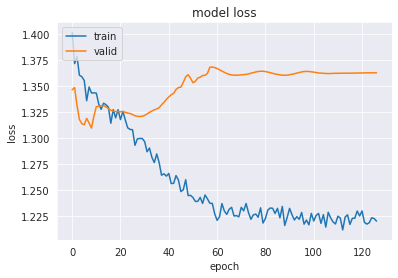

In [21]:
if nas:
    for trial in history: 
        print(trial.summary())
        
    writepath_nas = './results_nas.csv'

    if different_eval_data:
        flat_config = flatten_dict(config_train)
    else:
        flat_config = flatten_dict(config)    

    if not os.path.exists(writepath_nas):
        with open(writepath_nas, 'w+') as text_file:       
            for key in flat_config.keys():
                text_file.write(key)
                text_file.write(';')         

            for hp in history[0].hyperparameters.values.keys():
                text_file.write(hp + ';')    
               
            text_file.write('score')
            
            text_file.write('\n')

    with open(writepath_nas, 'a+') as text_file:  
        for value in flat_config.values():
            text_file.write(str(value))
            text_file.write(';')

        for hp, value in history[0].hyperparameters.values.items():
            text_file.write(str(value) + ';')        

        
        text_file.write(str(history[0].score))
            
        text_file.write('\n')            

        text_file.close()      
        
else:
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')    

# make_classification evaluation Paul

In [22]:
config_LR = {
    'data': {
        'n_datasets': 10,   
    }
}

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error

def precision(tp, fp, tn, fn):
    return tp / (tp + fp)
def recall(tp, fp, tn, fn):
    return tp / (tp + fn)
def f1(tp, fp, tn, fn):
    pre = precision(tp, fp, tn, fn)
    rec = recall(tp, fp, tn, fn)
    return 2 * (pre * rec) / (pre + rec)

In [24]:
def evaluateSingleSample(i, loss_function, metrics, config):
    
    informative = np.random.randint(config['data']['number_of_variables']//2, high=config['data']['number_of_variables']+1) #config['data']['number_of_variables']
    redundant = np.random.randint(0, high=config['data']['number_of_variables']-informative+1) #0
    repeated = config['data']['number_of_variables']-informative-redundant # 0

    n_clusters_per_class =  max(2, np.random.randint(0, high=informative//2+1)) #2

    X_data, y_data = make_classification(n_samples=config['data']['lambda_dataset_size'], 
                                                       n_features=config['data']['number_of_variables'], #The total number of features. These comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features-n_informative-n_redundant-n_repeated useless features drawn at random.
                                                       n_informative=informative,#config['data']['number_of_variables'], #The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative.
                                                       n_redundant=redundant, #The number of redundant features. These features are generated as random linear combinations of the informative features.
                                                       n_repeated=repeated, #The number of duplicated features, drawn randomly from the informative and the redundant features.
                                                       n_classes=config['data']['num_classes'], 
                                                       n_clusters_per_class=n_clusters_per_class, 
                                                       #flip_y=0.0, #The fraction of samples whose class is assigned randomly. 
                                                       #class_sep=1.0, #The factor multiplying the hypercube size. Larger values spread out the clusters/classes and make the classification task easier.
                                                       #hypercube=False, #If True, the clusters are put on the vertices of a hypercube. If False, the clusters are put on the vertices of a random polytope.
                                                       #shift=0.0, #Shift features by the specified value. If None, then features are shifted by a random value drawn in [-class_sep, class_sep].
                                                       #scale=1.0, #Multiply features by the specified value. 
                                                       shuffle=True, 
                                                       random_state=100_000+i) 
    
    ## normalisierung
    for i, column in enumerate(X_data.T):
        scaler = MinMaxScaler()
        scaler.fit(column.reshape(-1, 1))
        X_data[:,i] = scaler.transform(column.reshape(-1, 1)).ravel()    
    
    X_train, y_train, X_valid, y_valid, X_test, y_test = split_train_test_valid(X_data, y_data, valid_frac=0.25, test_frac=0.1, seed=42)
    
    
    lambda_net = generate_base_model(config)
    
    x_lambda_weights = shaped_network_parameters_to_array(lambda_net.get_weights(), config)
    
    
    #### so meinte ich das quasi wie du ein logistic regression model basierend auf den lambda-net predictions bekommst ###
    #model_valid = LogisticRegression()
    #model_valid.fit(X_data, network_parameters_to_network(x_lambda_weights, config).predict(X_train))      
    #y_coef_truth = model_valid.coef_

        
    inet_model = load_inet(loss_function, metrics, config)
    
    y_dt_pred = inet_model.predict(x_lambda_weights.reshape(1, -1))
    y_dt_pred = y_dt_pred[0]
    
    ## hier für den vergleich dann das model auch auf den network parameters trainieren ###
    #model_groundTruth = get_LR(X_train, network_parameters_to_network(x_lambda_weights, config).predict(X_train)
    
    #model_pred = LogisticRegression()
    #model_pred.coef_ = y_coef_pred
    #model_pred.intercept_ = 0
    #model_pred.classes_ = model_groundTruth.classes_
    
    
    model_pred_inet = parameterDT(y_dt_pred, config)
    
    y_train_lambda_net = network_parameters_to_network(x_lambda_weights, config).predict(X_train)
    model_standard = DecisionTreeClassifier(max_depth=config['function_family']['maximum_depth']) 
    model_standard.fit(X_train, np.round(y_train_lambda_net))
    
    y_lambda_net = np.round(network_parameters_to_network(x_lambda_weights, config).predict(X_test)).flatten()
    
    score_standard_model = model_standard.score(X_test, y_lambda_net)

    y_pred_standard_model = np.round(model_standard.predict(X_test))
    y_pred_inet_model  = np.round(model_pred_inet.predict(X_test))
    
    score_inet_model = accuracy_score(y_lambda_net, y_pred_inet_model)

    tn, fp, fn, tp = confusion_matrix(y_lambda_net, y_pred_inet_model, labels=[1,0]).ravel()
    
    pre = precision(tp, fp, tn, fn)
    rec = recall(tp, fp, tn, fn)
    fone = f1(tp, fp, tn, fn)
    
    #results.append([i, score_groundTruthModel, score_predModel, mse, tp, fn, fp, tn, pre, rec, fone])
    
    return i+1, score_standard_model, score_inet_model, tp, fn, fp, tn, pre, rec, fone

In [25]:
parallel = Parallel(n_jobs=config['computation']['n_jobs'], verbose=10, backend='loky') #loky

result_list = parallel(delayed(evaluateSingleSample)(i, loss_function, metrics, config) for i in range(config_LR['data']['n_datasets']))

results = pd.DataFrame(data=result_list,
                       columns=["index_0=aggregated", 
                                "scoreOnClassfication_BaseModel", 
                                "scoreOnClassfication_PredictedModel" , 
                                #"mse",  
                                "tp", 
                                "fn", 
                                "fp", 
                                "tn", 
                                "precision", 
                                "recall", 
                                "f1"])


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


16/16 [==============================] - 0s 431us/step


[Parallel(n_jobs=15)]: Done   3 out of  10 | elapsed:    1.4s remaining:    3.2s
[Parallel(n_jobs=15)]: Done   5 out of  10 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=15)]: Done   7 out of  10 | elapsed:    1.4s remaining:    0.6s
[Parallel(n_jobs=15)]: Done  10 out of  10 | elapsed:    1.4s finished


In [26]:
results.head(10)

,index_0=aggregated,scoreOnClassfication_BaseModel,scoreOnClassfication_PredictedModel,tp,fn,fp,tn,precision,recall,f1
0,10,0.998,0.030,15,485,0,0,1.000,0.030,0.058
1,10,0.990,0.034,13,483,0,4,1.000,0.026,0.051
2,10,1.000,0.030,15,485,0,0,1.000,0.030,0.058
3,10,1.000,0.042,21,479,0,0,1.000,0.042,0.081
4,10,0.998,0.030,15,484,1,0,0.938,0.030,0.058
5,10,0.992,0.018,7,491,0,2,1.000,0.014,0.028
6,10,0.972,0.058,19,466,5,10,0.792,0.039,0.075
7,10,0.992,0.076,34,462,0,4,1.000,0.069,0.128
8,10,0.978,0.038,10,481,0,9,1.000,0.020,0.040
9,10,0.994,0.048,21,476,0,3,1.000,0.042,0.081


# ab hier ignorieren

In [27]:
if False:
    index = 0
    lambda_net = lambda_net_dataset_train.lambda_net_list[index]
    
    lambda_net_model = network_parameters_to_network(lambda_net.network_parameters, config)
    lambda_net_model_preds = lambda_net_model.predict(lambda_net.X_train_lambda)
    dt_train_data = DecisionTreeClassifier(max_depth=3)
    dt_train_data.fit(lambda_net.X_train_lambda, np.round(lambda_net_model_preds))
    
    random_data = np.random.uniform(0, 1, lambda_net.X_train_lambda.shape)
    lambda_net_model_preds_random = lambda_net_model.predict(random_data)
    dt_random_data = DecisionTreeClassifier(max_depth=3)
    dt_random_data.fit(random_data, np.round(lambda_net_model_preds_random))
    
    plot_decision_area_evaluation(lambda_net.X_train_lambda, 
                                lambda_net.y_train_lambda.flatten(), 
                                lambda_net.X_test_lambda, 
                                lambda_net.y_test_lambda.flatten(),
                                random_data,
                                lambda_net_model_preds_random.flatten(),                                   
                                lambda_net_model,
                                dt_train_data,
                                dt_random_data,
                                dt_random_data,
                                dt_random_data,
                                model.predict(np.array([lambda_net.network_parameters]))[0],
                                np.array([str(i) for i in range(lambda_net.X_train_lambda.shape[1])]),
                                config
                               )

    index = 0
    lambda_net = lambda_net_dataset_valid.lambda_net_list[index]
    
    lambda_net_model = network_parameters_to_network(lambda_net.network_parameters, config)
    lambda_net_model_preds = lambda_net_model.predict(lambda_net.X_train_lambda)
    dt_train_data = DecisionTreeClassifier(max_depth=3)
    dt_train_data.fit(lambda_net.X_train_lambda, np.round(lambda_net_model_preds))
    
    random_data = np.random.uniform(0, 1, lambda_net.X_train_lambda.shape)
    lambda_net_model_preds_random = lambda_net_model.predict(random_data)
    dt_random_data = DecisionTreeClassifier(max_depth=3)
    dt_random_data.fit(random_data, np.round(lambda_net_model_preds_random))
    
    plot_decision_area_evaluation(lambda_net.X_train_lambda, 
                                lambda_net.y_train_lambda.flatten(), 
                                lambda_net.X_test_lambda, 
                                lambda_net.y_test_lambda.flatten(),
                                random_data,
                                lambda_net_model_preds_random.flatten(), 
                                lambda_net_model,
                                dt_train_data,
                                dt_random_data,
                                dt_random_data,
                                dt_random_data,
                                model.predict(np.array([lambda_net.network_parameters]))[0],
                                np.array([str(i) for i in range(lambda_net.X_train_lambda.shape[1])]),
                                config
                               )    

1/1 [==============================] - 0s 178ms/step


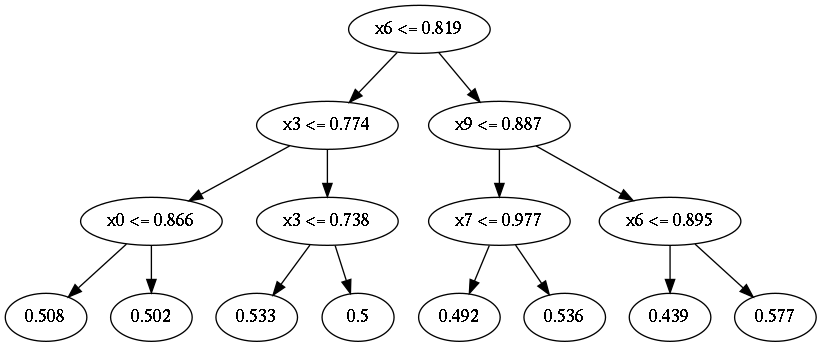

In [28]:
index = 0
if test_size > 0 and not evaluate_distribution:
    network_parameters = np.array([lambda_net_dataset_test.network_parameters_array[index]])
else:
    network_parameters = np.array([lambda_net_dataset_valid.network_parameters_array[index]])
    
if config['i_net']['data_reshape_version'] == 1 or config['i_net']['data_reshape_version'] == 2:
    network_parameters, network_parameters_flat = restructure_data_cnn_lstm(network_parameters, config, subsequences=None)
elif config['i_net']['data_reshape_version'] == 3: #autoencoder
    encoder_model = load_encoder_model(config)
    network_parameters, network_parameters_flat, _ = autoencode_data(network_parameters, config, encoder_model)    
dt_parameters = model.predict(network_parameters)[0]

if config['function_family']['dt_type'] == 'vanilla':
    image, nodes = anytree_decision_tree_from_parameters(dt_parameters, config=config)
else:
    tree = generate_random_decision_tree(config)
    tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
    image = tree.plot_tree()
image

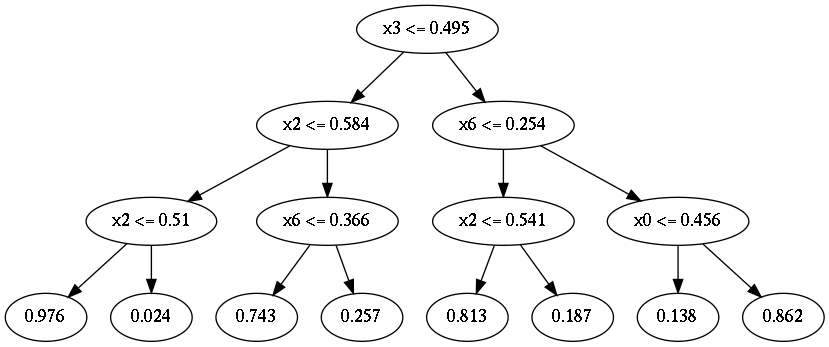

In [29]:
image = None
if not function_value_loss:
    if test_size > 0 and not evaluate_distribution:
        dt_parameters = y_test[index][:-2 ** config['function_family']['maximum_depth'] ]
    else:
        dt_parameters = y_valid[index][:-2 ** config['function_family']['maximum_depth'] ]

    image, nodes = anytree_decision_tree_from_parameters(dt_parameters, config=config)
image

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 1537)]       0           []                               
                                                                                                  
 hidden1_1792 (Dense)           (None, 1792)         2756096     ['input[0][0]']                  
                                                                                                  
 activation1_sigmoid (Activatio  (None, 1792)        0           ['hidden1_1792[0][0]']           
 n)                                                                                               
                                                                                                  
 hidden2_512 (Dense)            (None, 512)          918016      ['activation1_sigmoid[0][0]']

    Normal: This is useful for looking at means and other linear combinations (e.g. regression coefficients) because of the CLT. Related to that is if something is known to arise due to additive effects of many different small causes then the normal may be a reasonable distribution: for example, many biological measures are the result of multiple genes and multiple environmental factors and therefor are often approximately normal.

    Gamma: Right skewed and useful for things with a natural minimum at 0. Commonly used for elapsed times and some financial variables.

    Exponential: special case of the Gamma. It is memoryless and scales easily.

    Chi-squared (𝜒2): special case of the Gamma. Arises as sum of squared normal variables (so used for variances).

    Beta: Defined between 0 and 1 (but could be transformed to be between other values), useful for proportions or other quantities that must be between 0 and 1.

    Binomial: How many "successes" out of a given number of independent trials with same probability of "success".

    Poisson: Common for counts. Nice properties that if the number of events in a period of time or area follows a Poisson, then the number in twice the time or area still follows the Poisson (with twice the mean): this works for adding Poissons or scaling with values other than 2.

    Note that if events occur over time and the time between occurrences follows an exponential then the number that occur in a time period follows a Poisson.

    Negative Binomial: Counts with minimum 0 (or other value depending on which version) and no upper bound. Conceptually it is the number of "failures" before k "successes". The negative binomial is also a mixture of Poisson variables whose means come from a gamma distribution.

    Geometric: special case for negative binomial where it is the number of "failures" before the 1st "success". If you truncate (round down) an exponential variable to make it discrete, the result is geometric.

## Train & Valid Data Evaluation

In [31]:

mean_train_parameters = np.round(np.mean(lambda_net_dataset_train.network_parameters_array, axis=0), 5)
std_train_parameters = np.round(np.std(lambda_net_dataset_train.network_parameters_array, axis=0), 5)

(inet_evaluation_result_dict_train, 
 inet_evaluation_result_dict_mean_train, 
 dt_distilled_list_train,
 distances_dict) = evaluate_interpretation_net_synthetic_data(lambda_net_dataset_train.network_parameters_array, 
                                                               lambda_net_dataset_train.X_test_lambda_array,
                                                               model,
                                                               config,
                                                               identifier='train',
                                                               mean_train_parameters=mean_train_parameters,
                                                               std_train_parameters=std_train_parameters,
                                                               network_parameters_train_array=lambda_net_dataset_train.network_parameters_array)


(inet_evaluation_result_dict_valid, 
 inet_evaluation_result_dict_mean_valid, 
 dt_distilled_list_valid,
 distances_dict) = evaluate_interpretation_net_synthetic_data(lambda_net_dataset_valid.network_parameters_array, 
                                                               lambda_net_dataset_valid.X_test_lambda_array,
                                                               model,
                                                               config,
                                                               identifier='valid',
                                                               mean_train_parameters=mean_train_parameters,
                                                               std_train_parameters=std_train_parameters,
                                                               network_parameters_train_array=lambda_net_dataset_train.network_parameters_array,
                                                               distances_dict=distances_dict)

157/157 [==============================] - 0s 417us/step


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


40/40 [==============================] - 0s 432us/step


[Parallel(n_jobs=15)]: Done   5 out of   5 | elapsed:    0.8s finished


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


40/40 [==============================] - 0s 423us/step


[Parallel(n_jobs=15)]: Done   5 out of   5 | elapsed:    0.7s finished


  0%|          | 0/5 [00:00<?, ?it/s]

## Test Data Evaluation (+ Distribution Evaluation)

In [32]:
%load_ext autoreload
%autoreload 2
#set_loky_pickler('pickle')

In [33]:
#config['computation']['n_jobs'] = 60
#config['i_net']['test_size'] = 1000

In [34]:
if evaluate_distribution and test_size > 0:
    
    (distances_dict, 
     inet_evaluation_result_dict_test, 
     inet_evaluation_result_dict_complete_by_distribution_test,
     inet_evaluation_result_dict_mean_test,
     inet_evaluation_result_dict_mean_by_distribution_test,
     inet_evaluation_results_test, 
     dt_inet_list_test, 
     dt_distilled_list_test, 
     data_dict_list_test, 
     normalizer_list_list_test,
     test_network_list_distrib,
     model_history_list,
     distribution_parameter_list_list) = distribution_evaluation_interpretation_net_synthetic_data(loss_function, 
                                                                                            metrics,
                                                                                            #model,
                                                                                           config,
                                                                                           distribution_list_evaluation = config['data']['distribution_list_eval'],#['uniform', 'normal', 'gamma', 'exponential', 'beta', 'binomial', 'poisson'],
                                                                                           identifier='test',
                                                                                           lambda_net_parameters_train=lambda_net_dataset_train.network_parameters_array,
                                                                                           mean_train_parameters=mean_train_parameters,
                                                                                           std_train_parameters=std_train_parameters,
                                                                                           distances_dict=distances_dict,
                                                                                           max_distributions_per_class=max_distributions_per_class,#max_distributions_per_class,
                                                                                           flip_percentage=noise_injected_level, #0.1,#
                                                                                           data_noise=data_noise, #0.1,#
                                                                                           random_parameters = random_parameters_distribution, #random_parameters_distribution
                                                                                           verbose=0,
                                                                                           backend='loky',#sequential
                                                                                    )
else:
    (inet_evaluation_result_dict_test, 
     inet_evaluation_result_dict_mean_test, 
     dt_distilled_list_test,
     distances_dict) = evaluate_interpretation_net_synthetic_data(lambda_net_dataset_test.network_parameters_array, 
                                                                   lambda_net_dataset_test.X_test_lambda_array,
                                                                   model,
                                                                   config,
                                                                   identifier='test',
                                                                   mean_train_parameters=mean_train_parameters,
                                                                   std_train_parameters=std_train_parameters,
                                                                   network_parameters_train_array=lambda_net_dataset_train.network_parameters_array,
                                                                   distances_dict=distances_dict)
    
    print_results_synthetic_evaluation(inet_evaluation_result_dict_mean_train, 
                                       inet_evaluation_result_dict_mean_valid, 
                                       inet_evaluation_result_dict_mean_test, 
                                       distances_dict)    

[Parallel(n_jobs=15)]: Using backend LokyBackend with 15 concurrent workers.


16/16 [==============================] - 0s 504us/step


[Parallel(n_jobs=15)]: Done   2 out of   5 | elapsed:    9.1s remaining:   13.6s


16/16 [==============================] - 0s 458us/step


[Parallel(n_jobs=15)]: Done   5 out of   5 | elapsed:   11.6s finished


In [35]:
if evaluate_distribution and test_size > 0:
    #print(distribution_parameter_list_list[0])
    #print(lambda_net_dataset_valid.distribution_dict_list_list[0])

    inet_performance_distrib_evaluation = np.array(inet_evaluation_result_dict_complete_by_distribution_test[list(inet_evaluation_result_dict_complete_by_distribution_test.keys())[0]]['inet_scores']['accuracy'])
    print('I-Net Performance by Network: ', inet_performance_distrib_evaluation)

    mean_random_performance_distrib_evaluation = np.mean(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)
    print('Distilled Mean Performance by Network: ', mean_random_performance_distrib_evaluation)

    max_random_performance_distrib_evaluation = np.max(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)
    print('Distilled Max Performance by Network: ', max_random_performance_distrib_evaluation)

    print('Median I-Net:', np.median(inet_evaluation_result_dict_complete_by_distribution_test[list(inet_evaluation_result_dict_complete_by_distribution_test.keys())[0]]['inet_scores']['accuracy']))
    print('Median DT Distilled:', np.median(np.median(np.array([inet_evaluation_result_dict_complete_by_distribution_test[str(distrib)]['dt_scores']['accuracy'] for distrib in config['data']['distribution_list_eval']]), axis=0)))#np.median(inet_evaluation_result_dict_complete_by_distribution_test['uniform']['dt_scores']['accuracy']))

    complete_distribution_evaluation_results = get_complete_distribution_evaluation_results_dataframe(inet_evaluation_result_dict_mean_by_distribution_test)
    display(complete_distribution_evaluation_results.head(20))
    
    network_distances = get_print_network_distances_dataframe(distances_dict)
    display(network_distances.head(20))

I-Net Performance by Network:  [0.602 0.31  0.428 0.54  0.998]
Distilled Mean Performance by Network:  [0.624 0.542 0.99  0.512 0.984]
Distilled Max Performance by Network:  [0.624 0.542 0.99  0.512 0.984]
Median I-Net: 0.54
Median DT Distilled: 0.624


,Acc Distilled Train Data,Acc Distilled Data Random,Acc Distilled,Acc I-Net,Soft BC Distilled Train Data,Soft BC Distilled Data Random,Soft BC Distilled,Soft BC I-Net,BC Distilled Train Data,BC Distilled Data Random,BC Distilled,BC I-Net,F1 Score Distilled Train Data,F1 Score Distilled Data Random,F1 Score Distilled,F1 Score I-Net,ROC AUC Score Distilled Train Data,ROC AUC Score Distilled Data Random,ROC AUC Score Distilled,ROC AUC Score I-Net,Runtime Distilled Train Data,Runtime Distilled Data Random,Runtime Distilled,Runtime I-Net
"['uniform', 'normal', 'gamma', 'beta', 'poisson']",0.999,0.915,0.730,0.576,0.322,0.490,0.593,0.691,0.041,0.212,0.961,0.689,0.999,0.906,0.679,0.541,0.999,0.824,0.813,0.585,0.022,0.022,0.022,0.110


,Average Z-Score (Sample to Train Data),Average Distance to Initialization,Average Mean Distance to Train Data,Average Distance to closest Train Data Sample,Average Biggest Distance for Single Neuron,Minimum Biggest Distance for Single Neuron
train,1024.850,517.562,673.313,0.000,11.684,0.000
valid,2646.008,502.871,687.069,557.246,11.818,7.322
test,573.594,134.623,505.716,300.045,9.521,3.752


In [36]:
#%load_ext autoreload
#%autoreload 2

# Real-World Data Evaluation

In [37]:
#dataset_size_list = flatten_list([[config['evaluation']['random_evaluation_dataset_size_per_distribution']]*config['evaluation']['number_of_random_evaluations_per_distribution'], 'TRAINDATA', 'STANDARDUNIFORM', 'STANDARDNORMAL'])
dataset_size_list = flatten_list([[config['evaluation']['random_evaluation_dataset_size_per_distribution']]*config['evaluation']['number_of_random_evaluations_per_distribution'], 
                                  'TRAINDATA', 
                                  ['STANDARDUNIFORM']*config['evaluation']['number_of_random_evaluations_per_distribution'], 
                                  ['STANDARDNORMAL']*config['evaluation']['number_of_random_evaluations_per_distribution']])


dataset_size_list_print = []
for size in dataset_size_list:
    if type(size) is int:
        size = size//1000
        size = str(size) + 'k'
        dataset_size_list_print.append(size)
    else:
        dataset_size_list_print.append(size)

In [38]:
#distances_dict = {}
evaluation_result_dict = {}
results_dict = {}
dt_inet_dict = {}
dt_distilled_list_dict = {}
data_dict = {}
normalizer_list_dict = {}
test_network_list = {}

identifier_list = []


## Adult Dataset

In [39]:
feature_names = [
                 "Age", #0
                 "Workclass",  #1
                 "fnlwgt",  #2
                 "Education",  #3
                 "Education-Num",  #4
                 "Marital Status", #5
                 "Occupation",  #6
                 "Relationship",  #7
                 "Race",  #8
                 "Sex",  #9
                 "Capital Gain",  #10
                 "Capital Loss", #11
                 "Hours per week",  #12
                 "Country", #13
                 "capital_gain" #14
                ] 

adult_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=feature_names, index_col=False)


#adult_data['Workclass'][adult_data['Workclass'] != ' Private'] = 'Other'
#adult_data['Race'][adult_data['Race'] != ' White'] = 'Other'

#adult_data.head()

features_select = [
                 "Sex",  #9 
                 "Race",  #8
                 "Workclass",  #1
                 "Age", #0
                 "fnlwgt",  #2
                 #"Education",  #3
                 "Education-Num",  #4
                 "Marital Status", #5
                 #"Occupation",  #6
                 #"Relationship",  #7
                 "Capital Gain",  #10
                 "Capital Loss", #11
                 "Hours per week",  #12
                 #"Country", #13 
                 "capital_gain"
                  ]

adult_data = adult_data[features_select]

nominal_features_adult = [
                          'Race', 
                          'Workclass', 
                          #'Education',
                          "Marital Status",
                          #"Occupation", 
                          #"Relationship"
                        ]
ordinal_features_adult = ['Sex']

X_data_adult = adult_data.drop(['capital_gain'], axis = 1)

#y_data_adult = pd.Series(OrdinalEncoder().fit_transform(adult_data['capital_gain'].values.reshape(-1, 1)).flatten(), name='capital_gain')
y_data_adult = ((adult_data['capital_gain'] != ' <=50K') * 1)

In [40]:
config_train_network_adult = deepcopy(config)
#config_train_network_adult['lambda_net']['batch_lambda'] = 32
#config_train_network_adult['lambda_net']['learning_rate_lambda'] = 0.0003
#config_train_network_adult['lambda_net']['dropout_lambda'] = 0.25
#config_train_network_adult['lambda_net']['epochs_lambda'] = 5

In [41]:
identifier = 'Adult'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_adult, 
                                                                y_data_adult, 
                                                                nominal_features = nominal_features_adult, 
                                                                ordinal_features = ordinal_features_adult,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = config_train_network_adult)

print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict['Adult'], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (32561, 10)
Original Data Shape (encoded):  (32561, 28)
Original Data Class Distribution:  7841  (true) / 24720  (false)


In [42]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [43]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Titanic Dataset

In [44]:
titanic_data = pd.read_csv("./real_world_datasets/Titanic/train.csv")

titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace = True)
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace = True)
    
titanic_data['Embarked'].fillna('S', inplace = True)

features_select = [
                    #'Cabin', 
                    #'Ticket', 
                    #'Name', 
                    #'PassengerId'    
                    'Sex',    
                    'Embarked',
                    'Pclass',
                    'Age',
                    'SibSp',    
                    'Parch',
                    'Fare',    
                    'Survived',    
                  ]

titanic_data = titanic_data[features_select]

nominal_features_titanic = ['Embarked']#[1, 2, 7]
ordinal_features_titanic = ['Sex']
    
X_data_titanic = titanic_data.drop(['Survived'], axis = 1)
y_data_titanic = titanic_data['Survived']


    survival	Survival	0 = No, 1 = Yes
    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	Sex	
    Age	Age in years	
    sibsp	# of siblings / spouses aboard the Titanic	
    parch	# of parents / children aboard the Titanic	
    ticket	Ticket number	
    fare	Passenger fare	
    cabin	Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [45]:
identifier = 'Titanic'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_titanic, 
                                                                y_data_titanic, 
                                                                nominal_features = nominal_features_titanic, 
                                                                ordinal_features = ordinal_features_titanic,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (891, 7)
Original Data Shape (encoded):  (891, 9)
Original Data Class Distribution:  342  (true) / 549  (false)


In [46]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [47]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     
    
    y_train = data_dict[identifier]['y_train']
    y_train_pred = pd.Series(np.round(test_network_list[identifier].predict(data_dict[identifier]['X_train'])).ravel(), 
                             name="Survived")
    X_data = pd.concat([data_dict[identifier]['X_train'], y_train_pred], axis=1)
    display(X_data.head())
    
    X_data.groupby("Survived").SibSp.hist(alpha=0.6)
    plt.show()
    #X_data[X_data.Parch > 0.8].groupby("Survived").Age.hist(alpha=0.6)
    #plt.show()
    X_data.groupby("Survived").Age.hist(alpha=0.6)
    plt.show()
    X_data.groupby("Survived").Sex.hist(alpha=0.6)
    plt.show()
    
    
    uniform_data = generate_random_data_points_custom(config['data']['x_min'], 
                                   config['data']['x_max'],
                                   config['evaluation']['random_evaluation_dataset_size_per_distribution'], 
                                   config['data']['number_of_variables'], 
                                   config['data']['categorical_indices'],
                                   distrib='standarduniform',
                                   random_parameters=config['data']['random_parameters_distribution'],
                                   distrib_param_max=config['data']['distrib_param_max'],
                                   seed=config['computation']['RANDOM_SEED'],
                                   config=config)    
    
    y_uniform_data = np.round(test_network_list[identifier].predict(uniform_data))

    uniform_data_with_labels_df = pd.DataFrame(data=np.hstack([uniform_data, y_uniform_data]), columns=X_data.columns)    
    
    uniform_data_with_labels_df.groupby("Survived").SibSp.hist(alpha=0.6)
    plt.show()
    uniform_data_with_labels_df[uniform_data_with_labels_df.SibSp > 0.56].groupby("Survived").Age.hist(alpha=0.6)
    plt.show()
    uniform_data_with_labels_df[uniform_data_with_labels_df.SibSp < 0.56].groupby("Survived").Age.hist(alpha=0.6)
    plt.show()    
    
    uniform_data_with_labels_df.groupby("Survived").Age.hist(alpha=0.6)
    plt.show()
    uniform_data_with_labels_df.groupby("Survived").Sex.hist(alpha=0.6)
    plt.show()        
    
            

## Absenteeism at Work Dataset

In [48]:
absenteeism_data = pd.read_csv('real_world_datasets/Absenteeism/absenteeism.csv', delimiter=';')

features_select = [
                           'Disciplinary failure', #CATEGORICAL
                           'Social drinker', #CATEGORICAL
                           'Social smoker', #CATEGORICAL
                           'Transportation expense', 
                           'Distance from Residence to Work',
                           'Service time', 
                           'Age', 
                           'Work load Average/day ', 
                           'Hit target',
                           'Education', 
                           'Son', 
                           'Pet', 
                           'Weight', 
                           'Height', 
                           'Body mass index', 
                           'Absenteeism time in hours'
                        ]

absenteeism_data = absenteeism_data[features_select]

nominal_features_absenteeism = []
ordinal_features_absenteeism = []
    
X_data_absenteeism = absenteeism_data.drop(['Absenteeism time in hours'], axis = 1)
y_data_absenteeism = ((absenteeism_data['Absenteeism time in hours'] > 4) * 1) #absenteeism_data['Absenteeism time in hours']


    3. Month of absence
    4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
    5. Seasons (summer (1), autumn (2), winter (3), spring (4))
    6. Transportation expense
    7. Distance from Residence to Work (kilometers)
    8. Service time
    9. Age
    10. Work load Average/day
    11. Hit target
    12. Disciplinary failure (yes=1; no=0)
    13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
    14. Son (number of children)
    15. Social drinker (yes=1; no=0)
    16. Social smoker (yes=1; no=0)
    17. Pet (number of pet)
    18. Weight
    19. Height
    20. Body mass index
    21. Absenteeism time in hours (target)

In [49]:
identifier = 'Absenteeism'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_absenteeism, 
                                                                y_data_absenteeism, 
                                                                nominal_features = nominal_features_absenteeism, 
                                                                ordinal_features = ordinal_features_absenteeism,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)

print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (740, 15)
Original Data Shape (encoded):  (740, 15)
Original Data Class Distribution:  279  (true) / 461  (false)


In [50]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [51]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Loan House

In [52]:
loan_data = pd.read_csv('real_world_datasets/Loan/loan-train.csv', delimiter=',')

loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(), inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mean(), inplace=True)

features_select = [
                    #'Loan_ID', 
                    'Gender', #
                    'Married', 
                    'Dependents', 
                    'Education',
                    'Self_Employed', 
                    'ApplicantIncome', 
                    'CoapplicantIncome', 
                    'LoanAmount',
                    'Loan_Amount_Term', 
                    'Credit_History', 
                    'Property_Area', 
                    'Loan_Status'
                    ]

loan_data = loan_data[features_select]

#loan_data['Dependents'][loan_data['Dependents'] == '3+'] = 4
#loan_data['Dependents'] = loan_data['Dependents'].astype(int)

#loan_data['Property_Area'][loan_data['Property_Area'] == 'Rural'] = 0
#loan_data['Property_Area'][loan_data['Property_Area'] == 'Semiurban'] = 1
#loan_data['Property_Area'][loan_data['Property_Area'] == 'Urban'] = 2
#loan_data['Property_Area'] = loan_data['Property_Area'].astype(int)

nominal_features_loan = [
                        'Dependents',
                        'Property_Area',    
                        ]


ordinal_features_loan = [
                    'Education',
                    'Gender', 
                    'Married', 
                    'Self_Employed',
                   ]
    
X_data_loan = loan_data.drop(['Loan_Status'], axis = 1)
y_data_loan = ((loan_data['Loan_Status'] == 'Y') * 1) 

In [53]:
config_train_network_loan_house = deepcopy(config)
#config_train_network_loan_house['lambda_net']['batch_lambda'] = 64#16
#config_train_network_loan_house['lambda_net']['learning_rate_lambda'] = 0.001
#config_train_network_loan_house['lambda_net']['dropout_lambda'] = 0#.1
#config_train_network_loan_house['lambda_net']['epochs_lambda'] = 500
#config_train_network_loan_house['lambda_net']['optimizer_lambda'] = 'adam'


In [54]:
identifier = 'Loan House'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_loan, 
                                                                y_data_loan, 
                                                                nominal_features = nominal_features_loan, 
                                                                ordinal_features = ordinal_features_loan,
                                                                #config = config_train_network_loan_house,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (614, 11)
Original Data Shape (encoded):  (614, 16)
Original Data Class Distribution:  422  (true) / 192  (false)


In [55]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [56]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Loan Credit

In [57]:
loan_credit_data = pd.read_csv('real_world_datasets/Credit Loan/train_split.csv', delimiter=',')

loan_credit_data['emp_title'].fillna(loan_credit_data['emp_title'].mode()[0], inplace=True)
loan_credit_data['emp_length'].fillna(loan_credit_data['emp_length'].mode()[0], inplace=True)
#loan_credit_data['desc'].fillna(loan_credit_data['desc'].mode()[0], inplace=True)
loan_credit_data['title'].fillna(loan_credit_data['title'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_delinq'].fillna(loan_credit_data['mths_since_last_delinq'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_record'].fillna(loan_credit_data['mths_since_last_record'].mode()[0], inplace=True)
loan_credit_data['revol_util'].fillna(loan_credit_data['revol_util'].mode()[0], inplace=True)
loan_credit_data['collections_12_mths_ex_med'].fillna(loan_credit_data['collections_12_mths_ex_med'].mode()[0], inplace=True)
#loan_credit_data['mths_since_last_major_derog'].fillna(loan_credit_data['mths_since_last_major_derog'].mode()[0], inplace=True)
#loan_credit_data['verification_status_joint'].fillna(loan_credit_data['verification_status_joint'].mode()[0], inplace=True)
loan_credit_data['tot_coll_amt'].fillna(loan_credit_data['tot_coll_amt'].mode()[0], inplace=True)
loan_credit_data['tot_cur_bal'].fillna(loan_credit_data['tot_cur_bal'].mode()[0], inplace=True)
loan_credit_data['total_rev_hi_lim'].fillna(loan_credit_data['total_rev_hi_lim'].mode()[0], inplace=True)


##remove too many null
#'mths_since_last_delinq','mths_since_last_record', 'mths_since_last_major_derog','pymnt_plan','desc', 'verification_status_joint'


features_select = [
                    #'member_id', 
                    'loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'term',
                    #'batch_enrolled',
                    'int_rate', 
                    'grade', 
                    #'sub_grade', 
                    #'emp_title',
                    'emp_length',
                    'home_ownership', 
                    'annual_inc', 
                    'verification_status',
                    #'pymnt_plan', 
                    #'desc', 
                    'purpose', 
                    'title', 
                    #'zip_code', 
                    #'addr_state',
                    'dti', 
                    'delinq_2yrs', 
                    'inq_last_6mths', 
                    #'mths_since_last_delinq',
                    #'mths_since_last_record',
                    'open_acc', 
                    'pub_rec', 
                    'revol_bal',
                    'revol_util', 
                    'total_acc', 
                    'initial_list_status', 
                    'total_rec_int',
                    'total_rec_late_fee', 
                    'recoveries', 
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med', 
                    #'mths_since_last_major_derog',
                    'application_type', 
                    #'verification_status_joint', 
                    'last_week_pay',
                    'acc_now_delinq', 
                    'tot_coll_amt', 
                    'tot_cur_bal', 
                    'total_rev_hi_lim',
                    'loan_status'
                    ]

loan_credit_data = loan_credit_data[features_select]

nominal_features_loan_credit = [

                        ]
ordinal_features_loan_credit = [
                    #'member_id', 
                    'loan_amnt', 
                    'funded_amnt', 
                    'funded_amnt_inv', 
                    'term',
                    #'batch_enrolled',
                    'int_rate', 
                    'grade', 
                    #'sub_grade', 
                    #'emp_title',
                    'emp_length',
                    'home_ownership', 
                    'annual_inc', 
                    'verification_status',
                    #'pymnt_plan', 
                    #'desc', 
                    'purpose', 
                    'title', 
                    #'zip_code', 
                    #'addr_state',
                    'dti', 
                    'delinq_2yrs', 
                    'inq_last_6mths', 
                    #'mths_since_last_delinq',
                    #'mths_since_last_record',
                    'open_acc', 
                    'pub_rec', 
                    'revol_bal',
                    'revol_util', 
                    'total_acc', 
                    'initial_list_status', 
                    'total_rec_int',
                    'total_rec_late_fee', 
                    'recoveries', 
                    'collection_recovery_fee',
                    'collections_12_mths_ex_med', 
                    #'mths_since_last_major_derog',
                    'application_type', 
                    #'verification_status_joint', 
                    'last_week_pay',
                    'acc_now_delinq', 
                    'tot_coll_amt', 
                    'tot_cur_bal', 
                    'total_rev_hi_lim',
                   ]
    
X_data_loan_credit = loan_credit_data.drop(['loan_status'], axis = 1)
y_data_loan_credit = pd.Series(OrdinalEncoder().fit_transform(loan_credit_data['loan_status'].values.reshape(-1, 1)).flatten(), name='loan_status')


In [58]:
identifier = 'Loan Credit'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_loan_credit, 
                                                                y_data_loan_credit, 
                                                                nominal_features = nominal_features_loan_credit, 
                                                                ordinal_features = ordinal_features_loan_credit,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (63999, 32)
Original Data Shape (encoded):  (63999, 32)
Original Data Class Distribution:  15197  (true) / 48802  (false)


In [59]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [60]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Medical Insurance

In [61]:
medical_insurance_data = pd.read_csv('real_world_datasets/Medical Insurance/insurance.csv', delimiter=',')

features_select = [
                    'age', 
                    'sex', 
                    'bmi', 
                    'children', 
                    'smoker',
                    'region',
                    'charges'
                    ]

medical_insurance_data = medical_insurance_data[features_select]

nominal_features_medical_insurance = [
                    'region',
                        ]
ordinal_features_medical_insurance = [
                    'sex',
                    'smoker'
                   ]

    
X_data_medical_insurance = medical_insurance_data.drop(['charges'], axis = 1)
y_data_medical_insurance = ((medical_insurance_data['charges'] > 10_000) * 1)

X_data_medical_insurance.head()


,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [62]:
identifier = 'Medical Insurance'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_medical_insurance, 
                                                                y_data_medical_insurance, 
                                                                nominal_features = nominal_features_medical_insurance, 
                                                                ordinal_features = ordinal_features_medical_insurance,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (1338, 6)
Original Data Shape (encoded):  (1338, 9)
Original Data Class Distribution:  626  (true) / 712  (false)


In [63]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [64]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Bank Marketing

In [65]:
bank_data = pd.read_csv('real_world_datasets/Bank Marketing/bank-full.csv', delimiter=';') #bank

features_select = [
                    'age',
                    'job', 
                    'marital', 
                    'education', 
                    'default',
                    'housing',
                    'loan',
                    #'contact',
                    #'day',
                    #'month',
                    'duration',
                    'campaign',
                    'pdays',
                    'previous',
                    'poutcome',
                    'y',
                    ]

bank_data = bank_data[features_select]

nominal_features_bank = [
                        'job',
                        'education',
                        #'contact',
                        #'day',
                        #'month',
                        'poutcome',
                        ]
ordinal_features_bank = [
                    'marital',
                    'default',
                    'housing',
                    'loan',
                   ]

    
X_data_bank = bank_data.drop(['y'], axis = 1)
y_data_bank = pd.Series(OrdinalEncoder().fit_transform(bank_data['y'].values.reshape(-1, 1)).flatten(), name='y')


In [66]:
identifier = 'Bank Marketing'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_bank, 
                                                                y_data_bank, 
                                                                nominal_features = nominal_features_bank, 
                                                                ordinal_features = ordinal_features_bank,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (45211, 12)
Original Data Shape (encoded):  (45211, 29)
Original Data Class Distribution:  5289  (true) / 39922  (false)


In [67]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [68]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Cervical cancer (Risk Factors) Data Set

In [69]:
cc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv', index_col=False)#, names=feature_names

features_select = [
                    'Age',
                    'Number of sexual partners',
                    'First sexual intercourse',
                    'Num of pregnancies',
                    'Smokes',
                    'Smokes (years)',
                    'Hormonal Contraceptives',
                    'Hormonal Contraceptives (years)',
                    'IUD',
                    'IUD (years)',
                    'STDs',
                    'STDs (number)',
                    'STDs: Number of diagnosis',
                    'STDs: Time since first diagnosis',
                    'STDs: Time since last diagnosis',
                    'Biopsy'
                    ]

cc_data = cc_data[features_select]

cc_data['Number of sexual partners'][cc_data['Number of sexual partners'] == '?'] = cc_data['Number of sexual partners'].mode()[0]
cc_data['First sexual intercourse'][cc_data['First sexual intercourse'] == '?'] = cc_data['First sexual intercourse'].mode()[0]
cc_data['Num of pregnancies'][cc_data['Num of pregnancies'] == '?'] = cc_data['Num of pregnancies'].mode()[0]
cc_data['Smokes'][cc_data['Smokes'] == '?'] = cc_data['Smokes'].mode()[0]
cc_data['Smokes (years)'][cc_data['Smokes (years)'] == '?'] = cc_data['Smokes (years)'].mode()[0]
cc_data['Hormonal Contraceptives'][cc_data['Hormonal Contraceptives'] == '?'] = cc_data['Hormonal Contraceptives'].mode()[0]
cc_data['Hormonal Contraceptives (years)'][cc_data['Hormonal Contraceptives (years)'] == '?'] = cc_data['Hormonal Contraceptives (years)'].mode()[0]
cc_data['IUD'][cc_data['IUD'] == '?'] = cc_data['IUD'].mode()[0]
cc_data['IUD (years)'][cc_data['IUD (years)'] == '?'] = cc_data['IUD (years)'].mode()[0]
cc_data['STDs'][cc_data['STDs'] == '?'] = cc_data['STDs'].mode()[0]
cc_data['STDs (number)'][cc_data['STDs (number)'] == '?'] = cc_data['STDs (number)'].mode()[0]
cc_data['STDs: Time since first diagnosis'][cc_data['STDs: Time since first diagnosis'] == '?'] = cc_data['STDs: Time since first diagnosis'][cc_data['STDs: Time since first diagnosis'] != '?'].mode()[0]
cc_data['STDs: Time since last diagnosis'][cc_data['STDs: Time since last diagnosis'] == '?'] = cc_data['STDs: Time since last diagnosis'][cc_data['STDs: Time since last diagnosis'] != '?'].mode()[0]

nominal_features_cc = [
                        ]
ordinal_features_cc = [
                   ]

    
X_data_cc = cc_data.drop(['Biopsy'], axis = 1)
y_data_cc = pd.Series(OrdinalEncoder().fit_transform(cc_data['Biopsy'].values.reshape(-1, 1)).flatten(), name='Biopsy')


In [70]:
identifier = 'Cervical Cancer'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_cc, 
                                                                y_data_cc, 
                                                                nominal_features = nominal_features_cc, 
                                                                ordinal_features = ordinal_features_cc,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (858, 15)
Original Data Shape (encoded):  (858, 15)
Original Data Class Distribution:  55  (true) / 803  (false)


In [71]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [72]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Brest Cancer Wisconsin

In [73]:
feature_names = [
                'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
                ]

bcw_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', names=feature_names, index_col=False)

bcw_data['Clump Thickness'][bcw_data['Clump Thickness'] == '?'] = bcw_data['Clump Thickness'].mode()[0]
bcw_data['Uniformity of Cell Size'][bcw_data['Uniformity of Cell Size'] == '?'] = bcw_data['Uniformity of Cell Size'].mode()[0]
bcw_data['Uniformity of Cell Shape'][bcw_data['Uniformity of Cell Shape'] == '?'] = bcw_data['Uniformity of Cell Shape'].mode()[0]
bcw_data['Marginal Adhesion'][bcw_data['Marginal Adhesion'] == '?'] = bcw_data['Marginal Adhesion'].mode()[0]
bcw_data['Single Epithelial Cell Size'][bcw_data['Single Epithelial Cell Size'] == '?'] = bcw_data['Single Epithelial Cell Size'].mode()[0]
bcw_data['Bare Nuclei'][bcw_data['Bare Nuclei'] == '?'] = bcw_data['Bare Nuclei'].mode()[0]
bcw_data['Bland Chromatin'][bcw_data['Bland Chromatin'] == '?'] = bcw_data['Bland Chromatin'].mode()[0]
bcw_data['Normal Nucleoli'][bcw_data['Normal Nucleoli'] == '?'] = bcw_data['Normal Nucleoli'].mode()[0]
bcw_data['Mitoses'][bcw_data['Mitoses'] == '?'] = bcw_data['Mitoses'].mode()[0]

features_select = [
                #'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
                'Uniformity of Cell Shape',
                'Marginal Adhesion',
                'Single Epithelial Cell Size',
                'Bare Nuclei',
                'Bland Chromatin',
                'Normal Nucleoli',
                'Mitoses',
                'Class',
                    ]

bcw_data = bcw_data[features_select]

nominal_features_bcw = [
                        ]
ordinal_features_bcw = [
                   ]

    
X_data_bcw = bcw_data.drop(['Class'], axis = 1)
y_data_bcw = pd.Series(OrdinalEncoder().fit_transform(bcw_data['Class'].values.reshape(-1, 1)).flatten(), name='Class')


In [74]:
identifier = 'Brest Cancer Wisconsin'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_bcw, 
                                                                y_data_bcw, 
                                                                nominal_features = nominal_features_bcw, 
                                                                ordinal_features = ordinal_features_bcw,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (699, 9)
Original Data Shape (encoded):  (699, 9)
Original Data Class Distribution:  241  (true) / 458  (false)


In [75]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [76]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Wisconsin Diagnostic Breast Cancer

In [77]:
feature_names = [
                'ID number',
                'Diagnosis',
                'radius',# (mean of distances from center to points on the perimeter)
                'texture',# (standard deviation of gray-scale values)
                'perimeter',
                'area',
                'smoothness',# (local variation in radius lengths)
                'compactness',# (perimeter^2 / area - 1.0)
                'concavity',# (severity of concave portions of the contour)
                'concave points',# (number of concave portions of the contour)
                'symmetry',
                'fractal dimension',# ("coastline approximation" - 1)
                ]
#Wisconsin Diagnostic Breast Cancer
wdbc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names=feature_names, index_col=False)

features_select = [
                    #'ID number',
                    'Diagnosis',
                    'radius',# (mean of distances from center to points on the perimeter)
                    'texture',# (standard deviation of gray-scale values)
                    'perimeter',
                    'area',
                    'smoothness',# (local variation in radius lengths)
                    'compactness',# (perimeter^2 / area - 1.0)
                    'concavity',# (severity of concave portions of the contour)
                    'concave points',# (number of concave portions of the contour)
                    'symmetry',
                    'fractal dimension',# ("coastline approximation" - 1)
                    ]

wdbc_data = wdbc_data[features_select]

nominal_features_wdbc = [
                        ]
ordinal_features_wdbc = [
                   ]

    
X_data_wdbc = wdbc_data.drop(['Diagnosis'], axis = 1)
y_data_wdbc= pd.Series(OrdinalEncoder().fit_transform(wdbc_data['Diagnosis'].values.reshape(-1, 1)).flatten(), name='Diagnosis')


Original Data Shape (selected):  (569, 10)
Original Data Shape (encoded):  (569, 10)
Original Data Class Distribution:  212  (true) / 357  (false)
(485, 10) (485,)
(28, 10) (28,)
(56, 10) (56,)
True Ratio:  0.37731958762886597


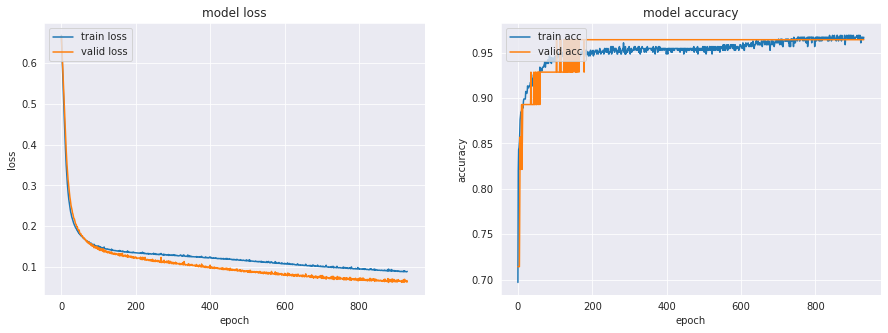

Training Network:  31.199572801589966
2/2 [==============================] - 0s 672us/step
Evaluate Network:  26.27150583267212
2/2 [==============================] - 0s 2ms/step
Evaluate Network Complete:  57.62684869766235


In [78]:
identifier = 'Wisconsin Diagnostic Breast Cancer'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_wdbc, 
                                                                y_data_wdbc, 
                                                                nominal_features = nominal_features_wdbc, 
                                                                ordinal_features = ordinal_features_wdbc,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Considered Columns:								 texture   concave points
2/2 [==============================] - 0s 3ms/step
Performance Network:								 0.9821428571428571
Fidelity DT Sklearn Train Data:							 0.9107142857142857
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.5535714285714286
Fidelity DT Sklearn Uniform Data:						 0.2857142857142857
Fidelity DT Sklearn Normal Data:						 0.2857142857142857
Fidelity DT I-Net:								 0.75
24300/24300 [==============================] - 11s 456us/step


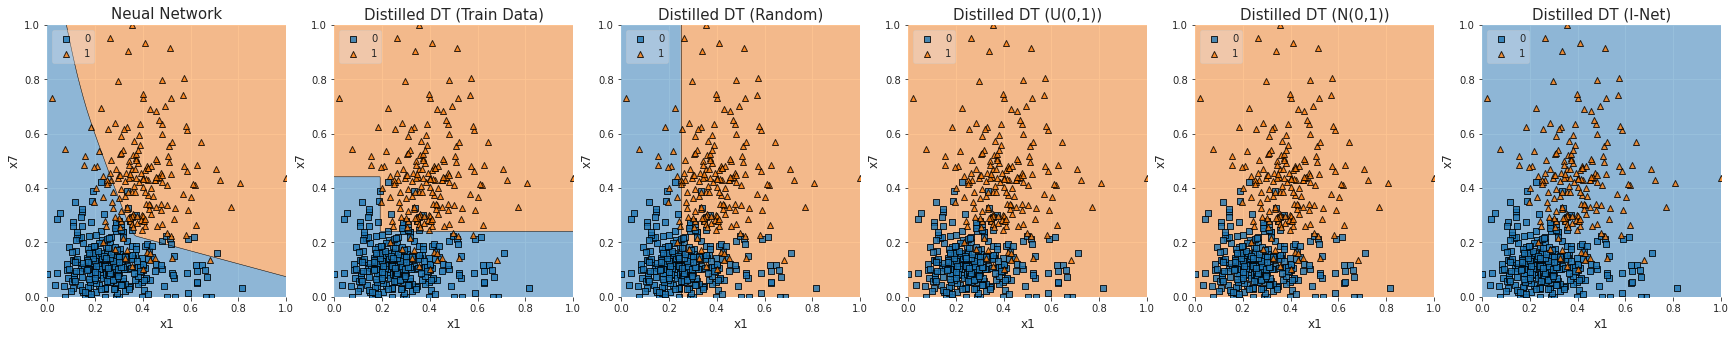

-----------------------------------------------------


In [79]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

x0 = radius (Scale: 0.04732831653178097)
x1 = texture (Scale: 0.033818058843422386)
x2 = perimeter (Scale: 0.006910372469076083)
x3 = area (Scale: 0.0004241781548250265)
x4 = smoothness (Scale: 9.02771508531191)
x5 = compactness (Scale: 3.0672964848782285)
x6 = concavity (Scale: 2.3430178069353325)
x7 = concave points (Scale: 4.970178926441352)
x8 = symmetry (Scale: 5.05050505050505)
x9 = fractal dimension (Scale: 21.061499578770007)


Accuracy Distilled Train 0.9107142857142857
Accuracy Distilled Train (Train Data) 0.9649484536082474
F1-Score Distilled Train 0.9128014842300557
F1-Score Distilled Train (Train Data) 0.9651039764359352


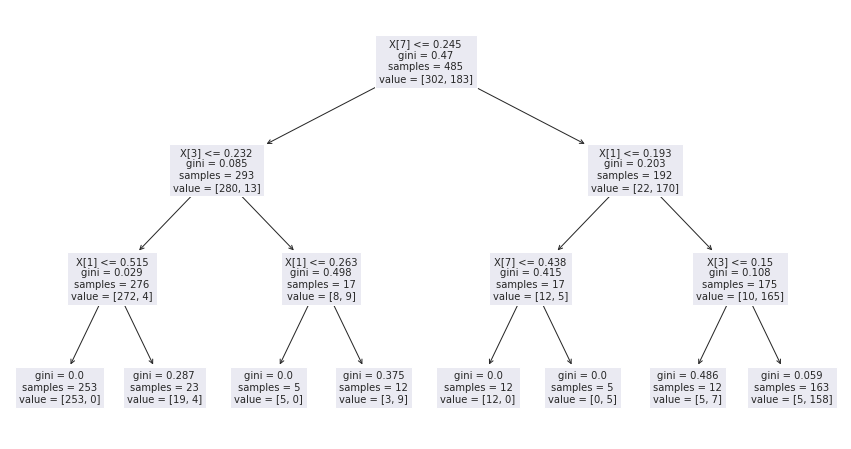

Accuracy I-Net 0.75
F1-Score  I-Net 0.6713947990543735


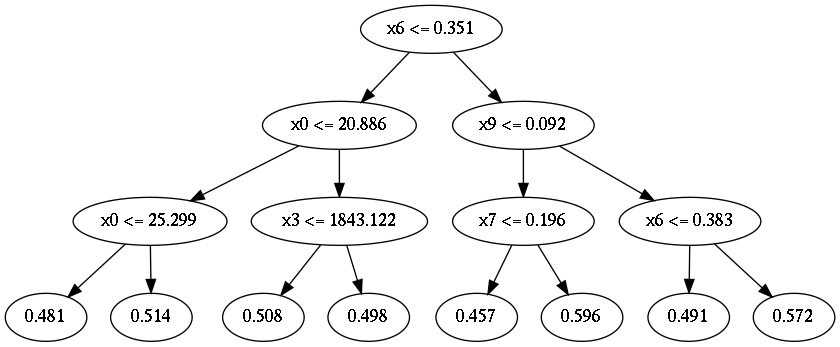

Accuracy Distilled Random 0.2857142857142857
Accuracy Distilled Random (Train Data) 0.8837
F1-Score  Distilled Random 0.126984126984127
F1-Score  Distilled Random (Train Data) 0.8800633031092391


<Figure size 1080x576 with 0 Axes>

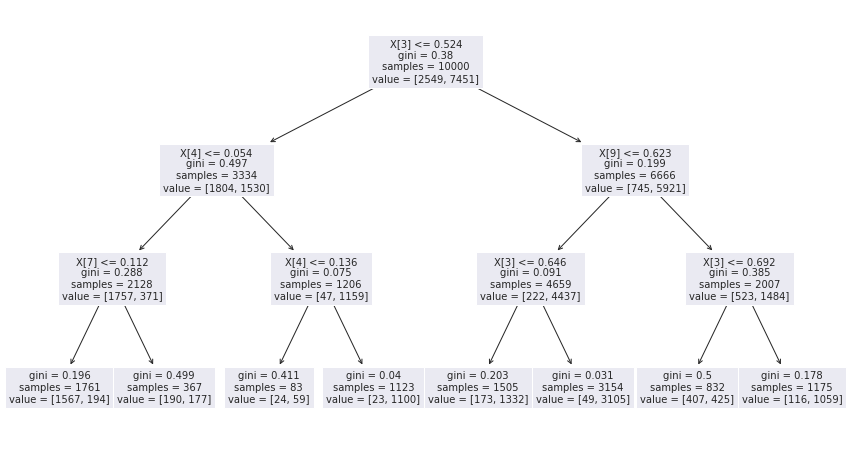

Accuracy Distilled Uniform 0.2857142857142857
Accuracy Distilled Uniform (Train Data) 0.8767
F1-Score  Distilled Uniform 0.126984126984127
F1-Score  Distilled Uniform (Train Data) 0.8593710124140763


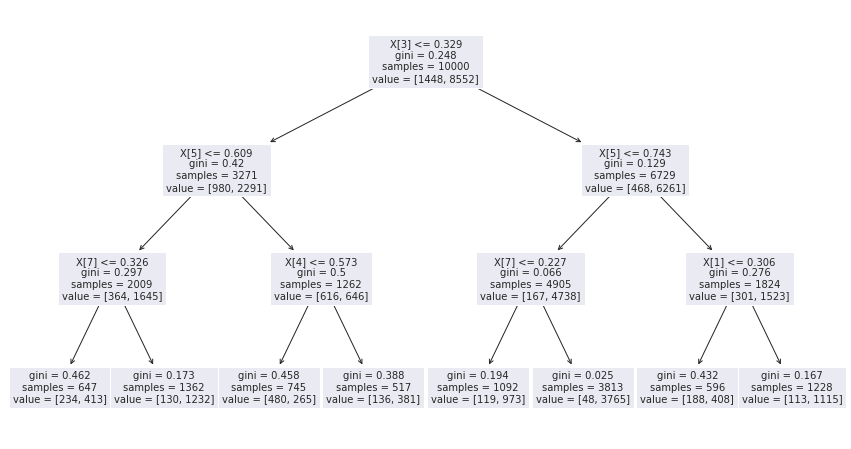

In [80]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Wisconsin Prognostic Breast Cancer

In [81]:
feature_names = [
                'ID number',
                'Diagnosis',
                'radius',# (mean of distances from center to points on the perimeter)
                'texture',# (standard deviation of gray-scale values)
                'perimeter',
                'area',
                'smoothness',# (local variation in radius lengths)
                'compactness',# (perimeter^2 / area - 1.0)
                'concavity',# (severity of concave portions of the contour)
                'concave points',# (number of concave portions of the contour)
                'symmetry',
                'fractal dimension',# ("coastline approximation" - 1)
                ]
#Wisconsin Prognostic Breast Cancer
wpbc_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data', names=feature_names, index_col=False)

features_select = [
                    #'ID number',
                    'Diagnosis',
                    'radius',# (mean of distances from center to points on the perimeter)
                    'texture',# (standard deviation of gray-scale values)
                    'perimeter',
                    'area',
                    'smoothness',# (local variation in radius lengths)
                    'compactness',# (perimeter^2 / area - 1.0)
                    'concavity',# (severity of concave portions of the contour)
                    'concave points',# (number of concave portions of the contour)
                    'symmetry',
                    'fractal dimension',# ("coastline approximation" - 1)
                    ]

wpbc_data = wpbc_data[features_select]

nominal_features_wpbc = [
                        ]
ordinal_features_wpbc = [
                   ]
 
X_data_wpbc = wpbc_data.drop(['Diagnosis'], axis = 1)
y_data_wpbc= pd.Series(OrdinalEncoder().fit_transform(wpbc_data['Diagnosis'].values.reshape(-1, 1)).flatten(), name='Diagnosis')


Original Data Shape (selected):  (198, 10)
Original Data Shape (encoded):  (198, 10)
Original Data Class Distribution:  47  (true) / 151  (false)
(170, 10) (170,)
(9, 10) (9,)
(19, 10) (19,)
True Ratio:  0.24705882352941178
True Ratio:  0.5


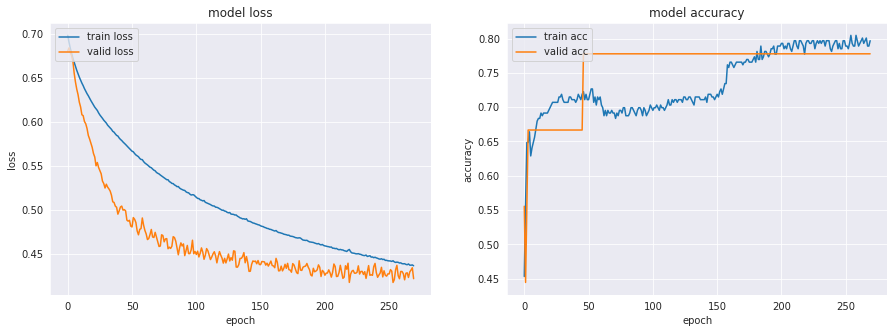

Training Network:  7.006274461746216
1/1 [==============================] - 0s 16ms/step
Evaluate Network:  27.62690305709839
1/1 [==============================] - 0s 42ms/step
Evaluate Network Complete:  34.84939908981323


In [82]:
identifier = 'Wisconsin Prognostic Breast Cancer'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_wpbc, 
                                                                y_data_wpbc, 
                                                                nominal_features = nominal_features_wpbc, 
                                                                ordinal_features = ordinal_features_wpbc,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Considered Columns:								 radius   compactness
1/1 [==============================] - 0s 33ms/step
Performance Network:								 0.7894736842105263
Fidelity DT Sklearn Train Data:							 0.631578947368421
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.6842105263157895
Fidelity DT Sklearn Uniform Data:						 0.6842105263157895
Fidelity DT Sklearn Normal Data:						 0.6842105263157895
Fidelity DT I-Net:								 0.3157894736842105
24300/24300 [==============================] - 11s 452us/step


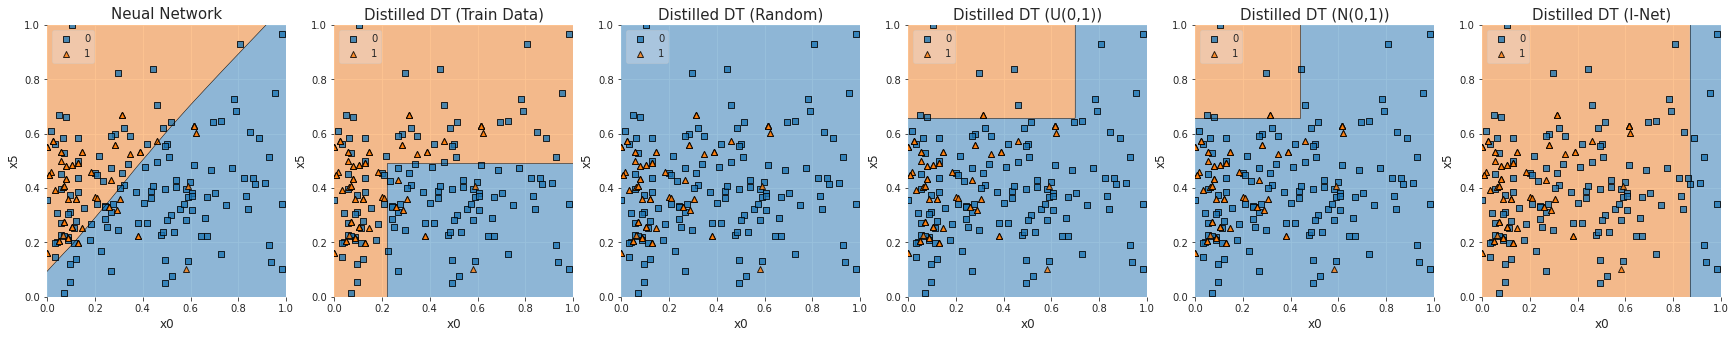

-----------------------------------------------------


In [83]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

x0 = radius (Scale: 0.008064516129032258)
x1 = texture (Scale: 0.06146281499692686)
x2 = perimeter (Scale: 0.03460207612456748)
x3 = area (Scale: 0.009074410163339383)
x4 = smoothness (Scale: 0.0005295488244016098)
x5 = compactness (Scale: 14.34102968593145)
x6 = concavity (Scale: 3.768607499528924)
x7 = concave points (Scale: 2.4824983863760486)
x8 = symmetry (Scale: 5.528221571120571)
x9 = fractal dimension (Scale: 5.773672055427252)


Accuracy Distilled Train 0.631578947368421
Accuracy Distilled Train (Train Data) 0.890625
F1-Score Distilled Train 0.6383805668016193
F1-Score Distilled Train (Train Data) 0.890403062165652


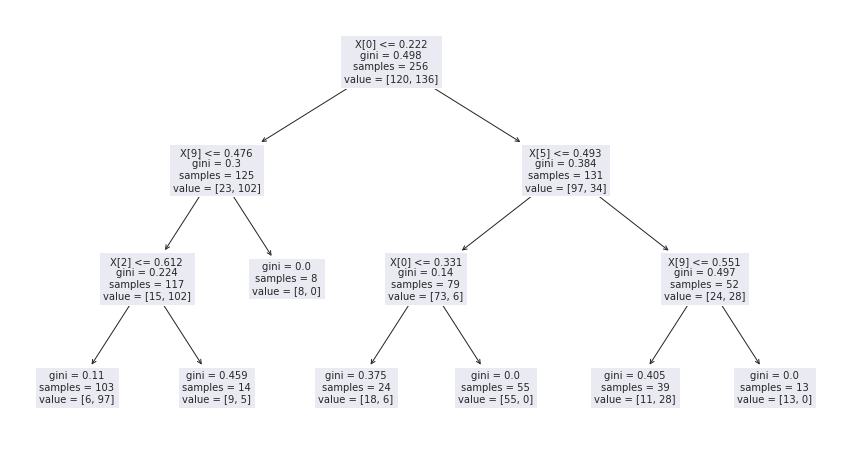

Accuracy I-Net 0.3157894736842105
F1-Score  I-Net 0.15157894736842104


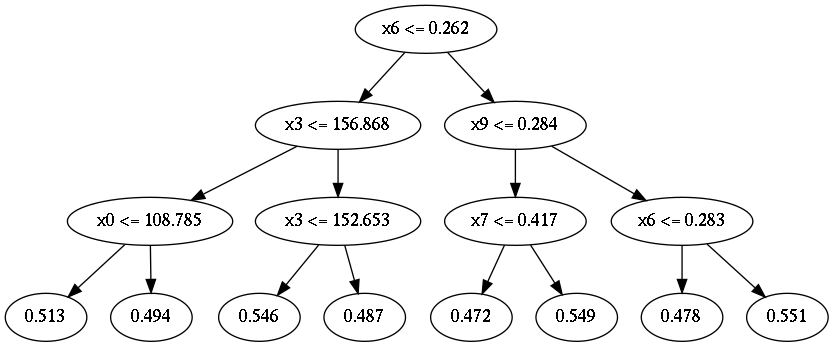

Accuracy Distilled Random 0.5789473684210527
Accuracy Distilled Random (Train Data) 0.8326
F1-Score  Distilled Random 0.5695906432748539
F1-Score  Distilled Random (Train Data) 0.8321846156343079


<Figure size 1080x576 with 0 Axes>

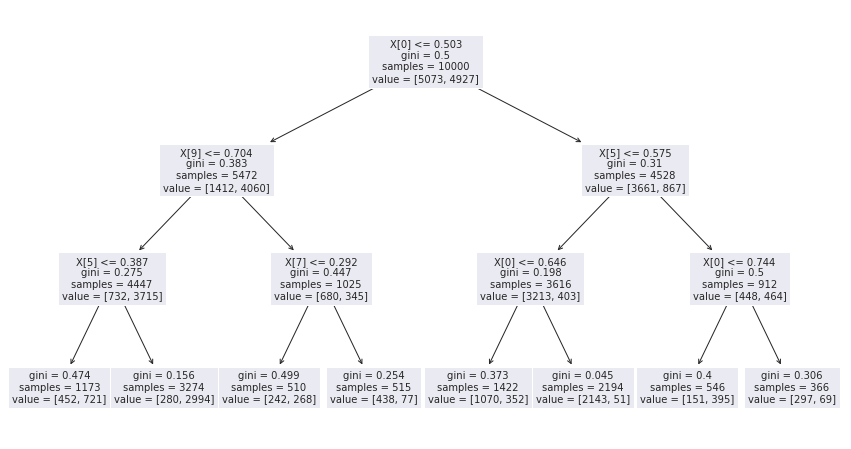

Accuracy Distilled Uniform 0.6842105263157895
Accuracy Distilled Uniform (Train Data) 0.8559
F1-Score  Distilled Uniform 0.5559210526315791
F1-Score  Distilled Uniform (Train Data) 0.8374298762799899


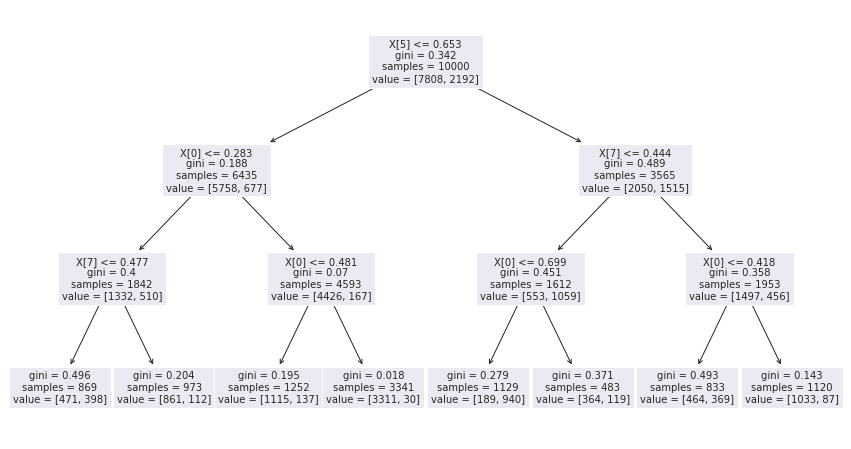

In [84]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Abalone

In [85]:
feature_names = [
                'Sex',#		nominal			M, F, and I (infant)
                'Length',#	continuous	mm	Longest shell measurement
                'Diameter',#	continuous	mm	perpendicular to length
                'Height',#		continuous	mm	with meat in shell
                'Whole weight',#	continuous	grams	whole abalone
                'Shucked weight',#	continuous	grams	weight of meat
                'Viscera weight',#	continuous	grams	gut weight (after bleeding)
                'Shell weight',#	continuous	grams	after being dried
                'Rings',#		integer			+1.5 gives the age in years
                ]

abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', names=feature_names, index_col=False)


features_select = [
                'Sex',#		nominal			M, F, and I (infant)
                'Length',#	continuous	mm	Longest shell measurement
                'Diameter',#	continuous	mm	perpendicular to length
                'Height',#		continuous	mm	with meat in shell
                'Whole weight',#	continuous	grams	whole abalone
                'Shucked weight',#	continuous	grams	weight of meat
                'Viscera weight',#	continuous	grams	gut weight (after bleeding)
                'Shell weight',#	continuous	grams	after being dried
                'Rings',#		integer			+1.5 gives the age in years
                    ]

abalone_data = abalone_data[features_select]

nominal_features_abalone = [
                        'Sex',
                        ]
ordinal_features_abalone = [
                   ]
   
X_data_abalone = abalone_data.drop(['Rings'], axis = 1)
y_data_abalone = ((abalone_data['Rings'] > 10) * 1)
    

Original Data Shape (selected):  (4177, 8)
Original Data Shape (encoded):  (4177, 10)
Original Data Class Distribution:  1447  (true) / 2730  (false)
(3552, 10) (3552,)
(208, 10) (208,)
(417, 10) (417,)
True Ratio:  0.3490990990990991


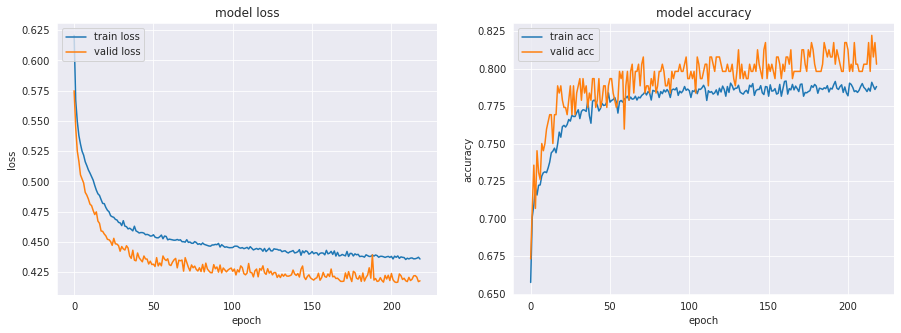

Training Network:  18.267728805541992
14/14 [==============================] - 0s 504us/step
Evaluate Network:  28.972617387771606
14/14 [==============================] - 0s 630us/step
Evaluate Network Complete:  47.39018130302429


In [86]:
identifier = 'Abalone'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_abalone, 
                                                                y_data_abalone, 
                                                                nominal_features = nominal_features_abalone, 
                                                                ordinal_features = ordinal_features_abalone,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Considered Columns:								 Shucked weight   Shell weight
14/14 [==============================] - 0s 543us/step
Performance Network:								 0.8057553956834532
Fidelity DT Sklearn Train Data:							 0.8585131894484412
Fidelity DT Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson']):   	 0.7961630695443646
Fidelity DT Sklearn Uniform Data:						 0.8033573141486811
Fidelity DT Sklearn Normal Data:						 0.2949640287769784
Fidelity DT I-Net:								 0.6354916067146283
24300/24300 [==============================] - 11s 469us/step


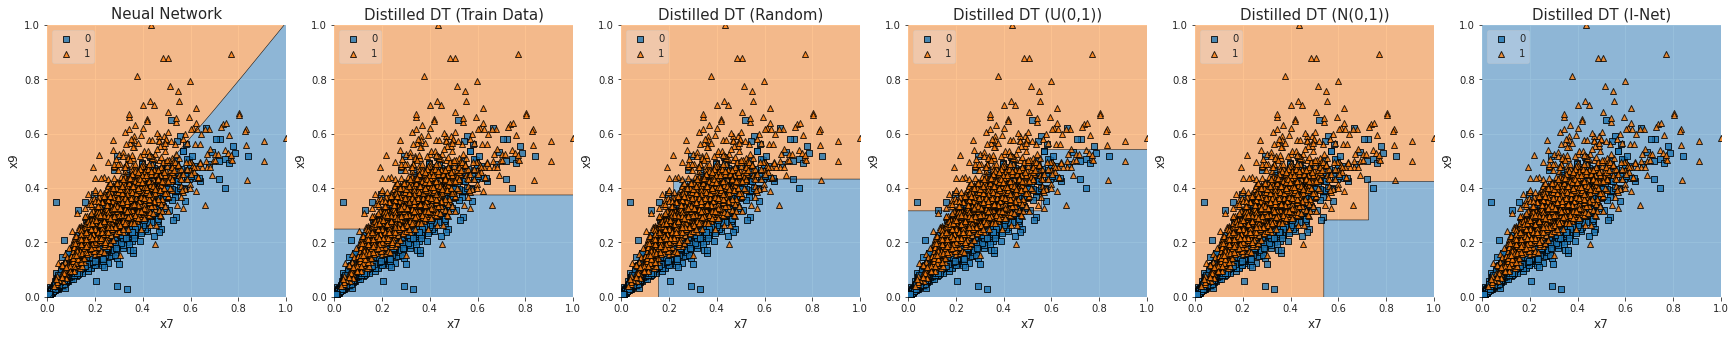

-----------------------------------------------------


In [87]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

x0 = cat__x0_F (Scale: 1.0)
x1 = cat__x0_I (Scale: 1.0)
x2 = cat__x0_M (Scale: 1.0)
x3 = Length (Scale: 1.3513513513513513)
x4 = Diameter (Scale: 1.680672268907563)
x5 = Height (Scale: 0.8849557522123894)
x6 = Whole weight (Scale: 0.3541703559412077)
x7 = Shucked weight (Scale: 0.6724949562878278)
x8 = Viscera weight (Scale: 1.3166556945358787)
x9 = Shell weight (Scale: 0.9965122072745393)


Accuracy Distilled Train 0.8585131894484412
Accuracy Distilled Train (Train Data) 0.9135698198198198
F1-Score Distilled Train 0.8538797931292331
F1-Score Distilled Train (Train Data) 0.9124363069068713


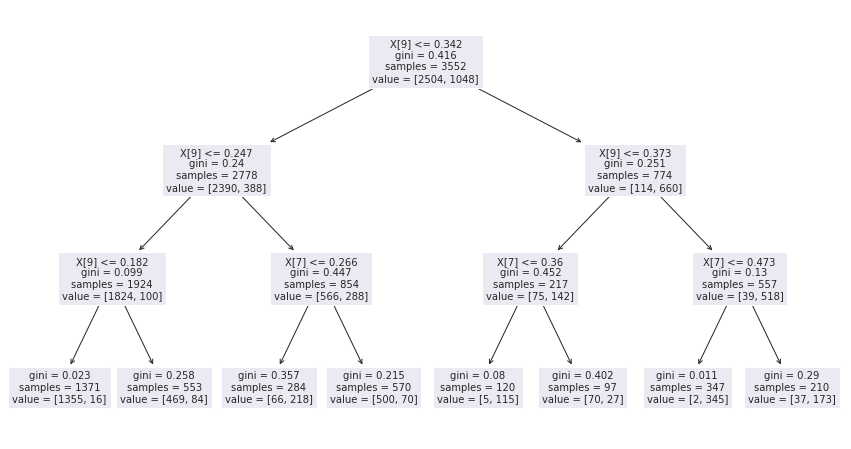

Accuracy I-Net 0.6354916067146283
F1-Score  I-Net 0.6050638048737683


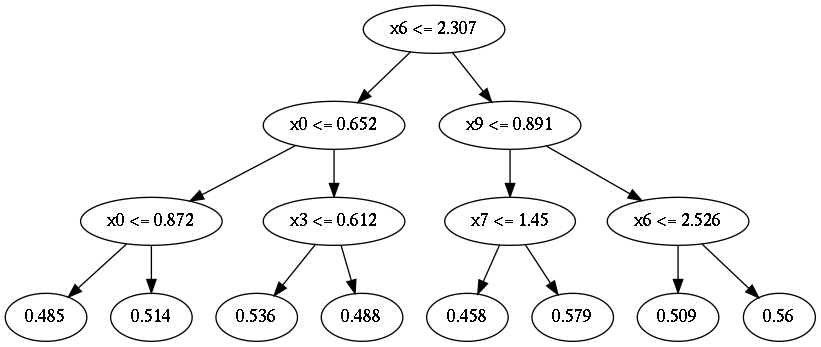

Accuracy Distilled Random 0.2829736211031175
Accuracy Distilled Random (Train Data) 0.8978
F1-Score  Distilled Random 0.2057842815070027
F1-Score  Distilled Random (Train Data) 0.8958908567855042


<Figure size 1080x576 with 0 Axes>

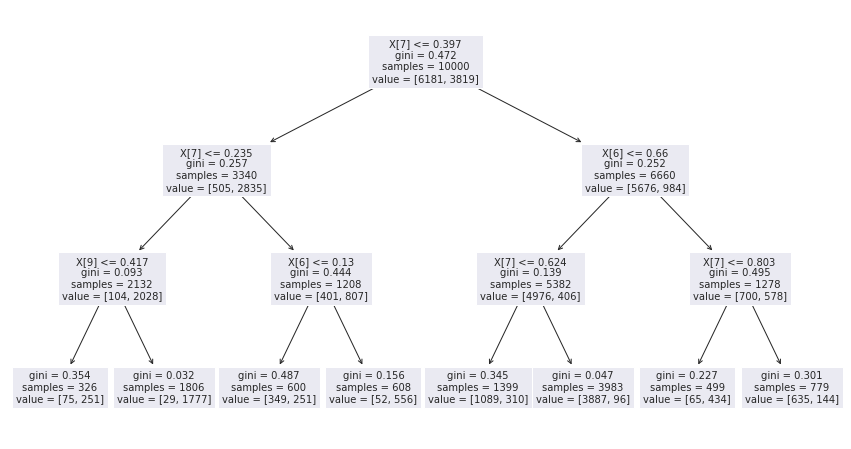

Accuracy Distilled Uniform 0.8033573141486811
Accuracy Distilled Uniform (Train Data) 0.8408
F1-Score  Distilled Uniform 0.8042570217798363
F1-Score  Distilled Uniform (Train Data) 0.8357588993630306


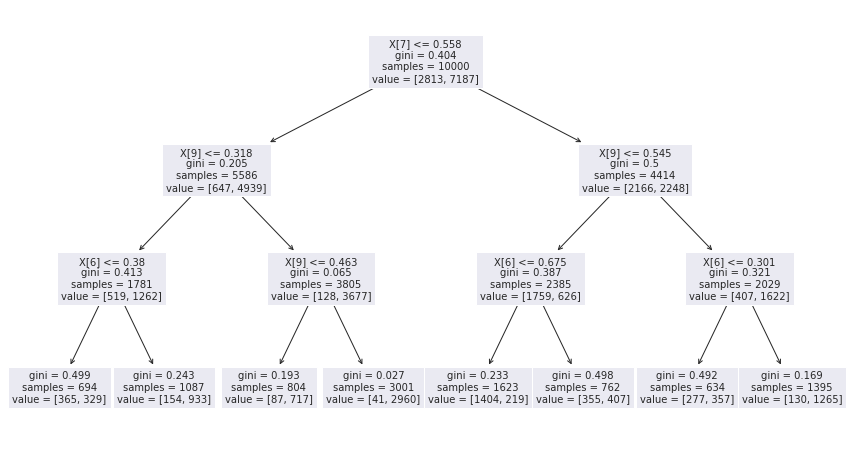

In [88]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Car

In [89]:
feature_names = [
   'buying',#       v-high, high, med, low
   'maint',#        v-high, high, med, low
   'doors',#        2, 3, 4, 5-more
   'persons',#      2, 4, more
   'lug_boot',#     small, med, big
   'safety',#       low, med, high
   'class',#        unacc, acc, good, v-good
                ]

car_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=feature_names, index_col=False)

features_select = [
                   'buying',#       v-high, high, med, low
                   'maint',#        v-high, high, med, low
                   'doors',#        2, 3, 4, 5-more
                   'persons',#      2, 4, more
                   'lug_boot',#     small, med, big
                   'safety',#       low, med, high
                   'class',#        unacc, acc, good, v-good
                    ]

car_data = car_data[features_select]

nominal_features_car = [
                       'buying',#       v-high, high, med, low
                       'maint',#        v-high, high, med, low
                       'doors',#        2, 3, 4, 5-more
                       'persons',#      2, 4, more
                       'lug_boot',#     small, med, big
                       'safety',#       low, med, high
                        ]

ordinal_features_car = [
                   ]


    
X_data_car = car_data.drop(['class'], axis = 1)
y_data_car = ((car_data['class'] != 'unacc') * 1)

In [90]:
identifier = 'Car'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_car, 
                                                                y_data_car, 
                                                                nominal_features = nominal_features_car, 
                                                                ordinal_features = ordinal_features_car,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (1728, 6)
Original Data Shape (encoded):  (1728, 21)
Original Data Class Distribution:  518  (true) / 1210  (false)


In [91]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [92]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Heart Disease Data Set

In [93]:
feature_names = [
   'age',#      
   'sex',#   
   'cp',#      
   'trestbps',#
   'chol',#    
   'fbs',#      
   'restecg',# 
   'thalach',#      
   'exang',#   
   'oldpeak',#      
   'slope',#
   'ca',#    
   'thal',#      
   'num',#     
                ]

heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names=feature_names, index_col=False) #, delimiter=' '
print(heart_data.shape)


nominal_features_heart = [
                        ]

ordinal_features_heart = [
                   ]


heart_data['age'][heart_data['age'] == '?'] = heart_data['age'].mode()[0]
heart_data['sex'][heart_data['sex'] == '?'] = heart_data['sex'].mode()[0]
heart_data['cp'][heart_data['cp'] == '?'] = heart_data['cp'].mode()[0]
heart_data['trestbps'][heart_data['trestbps'] == '?'] = heart_data['trestbps'].mode()[0]
heart_data['chol'][heart_data['chol'] == '?'] = heart_data['chol'].mode()[0]
heart_data['fbs'][heart_data['fbs'] == '?'] = heart_data['fbs'].mode()[0]
heart_data['restecg'][heart_data['restecg'] == '?'] = heart_data['restecg'].mode()[0]
heart_data['thalach'][heart_data['thalach'] == '?'] = heart_data['thalach'].mode()[0]
heart_data['exang'][heart_data['exang'] == '?'] = heart_data['exang'].mode()[0]
heart_data['oldpeak'][heart_data['oldpeak'] == '?'] = heart_data['oldpeak'].mode()[0]
heart_data['slope'][heart_data['slope'] == '?'] = heart_data['slope'].mode()[0]
heart_data['ca'][heart_data['ca'] == '?'] = heart_data['ca'].mode()[0]
heart_data['thal'][heart_data['thal'] == '?'] = heart_data['thal'].mode()[0]
    
X_data_heart = heart_data.drop(['num'], axis = 1)
y_data_heart = ((heart_data['num'] < 1) * 1)



(303, 14)


In [94]:
identifier = 'Heart Disease'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_heart, 
                                                                y_data_heart, 
                                                                nominal_features = nominal_features_heart, 
                                                                ordinal_features = ordinal_features_heart,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (303, 13)
Original Data Shape (encoded):  (303, 13)
Original Data Class Distribution:  164  (true) / 139  (false)


In [95]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [96]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Credit Card

In [97]:
credit_card_data = pd.read_csv('./real_world_datasets/UCI_Credit_Card/UCI_Credit_Card.csv', index_col=False) #, delimiter=' '
credit_card_data = credit_card_data.drop(['ID'], axis = 1)
print(credit_card_data.shape)

nominal_features_credit_card = [
                        ]

ordinal_features_credit_card = [
                   ]
    
X_data_credit_card = credit_card_data.drop(['default.payment.next.month'], axis = 1)
y_data_credit_card = ((credit_card_data['default.payment.next.month'] < 1) * 1)



(30000, 24)


In [98]:
identifier = 'Credit Card'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_credit_card, 
                                                                y_data_credit_card, 
                                                                nominal_features = nominal_features_credit_card, 
                                                                ordinal_features = ordinal_features_credit_card,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (30000, 23)
Original Data Shape (encoded):  (30000, 23)
Original Data Class Distribution:  23364  (true) / 6636  (false)


In [99]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [100]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Haberman's Survival Data Set

In [101]:
feature_names = [
   'age',#      
   'year',#   
   'nodes_detected',#      
   'survival',#     
                ]

haberman_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', names=feature_names, index_col=False) #, delimiter=' '
print(haberman_data.shape)


nominal_features_haberman = [
                        ]

ordinal_features_haberman = [
                   ]

    
X_data_haberman = haberman_data.drop(['survival'], axis = 1)
y_data_haberman = ((haberman_data['survival'] < 2) * 1)



(306, 4)


In [102]:
identifier = 'Haberman'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_haberman, 
                                                                y_data_haberman, 
                                                                nominal_features = nominal_features_haberman, 
                                                                ordinal_features = ordinal_features_haberman,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (306, 3)
Original Data Shape (encoded):  (306, 3)
Original Data Class Distribution:  225  (true) / 81  (false)


In [103]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [104]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

## Heart Failure

In [105]:
heart_failure_data = pd.read_csv('real_world_datasets/Heart Failure/heart_failure_clinical_records_dataset.csv', delimiter=',')


nominal_features_heart_failure = [
                        ]
ordinal_features_heart_failure = [

                   ]

    
X_data_heart_failure = heart_failure_data.drop(['DEATH_EVENT'], axis = 1)
y_data_heart_failure = ((heart_failure_data['DEATH_EVENT'] > 0) * 1)

X_data_heart_failure.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.000,0,582,0,20,1,265000.000,1.900,130,1,0,4
1,55.000,0,7861,0,38,0,263358.030,1.100,136,1,0,6
2,65.000,0,146,0,20,0,162000.000,1.300,129,1,1,7
3,50.000,1,111,0,20,0,210000.000,1.900,137,1,0,7
4,65.000,1,160,1,20,0,327000.000,2.700,116,0,0,8


In [106]:
identifier = 'Heart Failure'
identifier_list.append(identifier)

(distances_dict[identifier], 
 evaluation_result_dict[identifier], 
 results_dict[identifier], 
 dt_inet_dict[identifier], 
 dt_distilled_list_dict[identifier], 
 data_dict[identifier],
 normalizer_list_dict[identifier],
 test_network_list[identifier]) = evaluate_real_world_dataset(model,
                                                                dataset_size_list,
                                                                mean_train_parameters,
                                                                std_train_parameters,
                                                                lambda_net_dataset_train.network_parameters_array,
                                                                X_data_heart_failure, 
                                                                y_data_heart_failure, 
                                                                nominal_features = nominal_features_heart_failure, 
                                                                ordinal_features = ordinal_features_heart_failure,
                                                                config = config,
                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                config_train_network = None)
print_head = None
if verbosity > 0:
    print_results_different_data_sizes(results_dict[identifier], dataset_size_list_print)
    print_network_distances(distances_dict)

    dt_inet_plot = plot_decision_tree_from_parameters(dt_inet_dict[identifier], normalizer_list_dict[identifier], config)
    dt_distilled_plot = plot_decision_tree_from_model(dt_distilled_list_dict[identifier][-2], config)

    display(dt_inet_plot, dt_distilled_plot)

    print_head = data_dict[identifier]['X_train'].head()
print_head

Original Data Shape (selected):  (299, 12)
Original Data Shape (encoded):  (299, 12)
Original Data Class Distribution:  96  (true) / 203  (false)


In [107]:
if test_network_list[identifier] is not None:
    plot_decision_area_evaluation_all_distrib(data_dict[identifier]['X_train'].values, 
                                data_dict[identifier]['y_train'].values, 
                                data_dict[identifier]['X_test'].values, 
                                data_dict[identifier]['y_test'].values,
                                None,
                                None,
                                test_network_list[identifier],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('TRAINDATA')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDUNIFORM')],
                                dt_distilled_list_dict[identifier][0][dataset_size_list.index('STANDARDNORMAL')],
                                [dt_distilled_list_dict[identifier][0][dataset_size_list.index(config['evaluation']['random_evaluation_dataset_size_per_distribution'])]],
                                dt_inet_dict[identifier],
                                data_dict[identifier]['X_train'].columns,
                                config['data']['distribution_list_eval'],
                                config
                               )

In [108]:
if test_network_list[identifier] is not None:
    for index, (var_name, feature_name) in enumerate(zip(['x'+str(i) for i in range(len(data_dict[identifier]['X_train'].columns))], list(data_dict[identifier]['X_train'].columns))):
        scale_feature = normalizer_list_dict[identifier][index].scale_[0]
        print(var_name, '=', feature_name, '(Scale: ' +  str(scale_feature) + ')')
        
    acc_list = [results_dict[identifier][i]['dt_scores']['accuracy_' + str(distribution_list_eval[0])] for i in range(max(loc for loc, val in enumerate(dataset_size_list) if val == dataset_size_list[0]))]
    idx_min = np.argsort(acc_list)[0]#[len(acc_list)//2]
    idx_uniform = dataset_size_list.index('STANDARDUNIFORM')
    idx_train = dataset_size_list.index('TRAINDATA')
    
    print('\n')
    if config['function_family']['dt_type'] == 'vanilla':
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_train], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_inet = parameterDT(dt_inet_dict[identifier], config, normalizer_list=normalizer_list_dict[identifier])
        image = dt_inet.plot()
        display(image)
        
        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_min], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        plot_tree(dt_distilled_list_dict[identifier][0][idx_uniform], fontsize=10)  #fist index=distrib; second index=index; third index=10k vs Train
        plt.show()      

 
    else:
        print('Accuracy Distilled Train', results_dict[identifier][idx_train]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train', results_dict[identifier][idx_train]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score Distilled Train (Train Data)', results_dict[identifier][idx_train]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_train].plot_tree()
        display(image)
        
        print('Accuracy I-Net', results_dict[identifier][idx_min]['inet_scores']['accuracy'])
        print('F1-Score  I-Net', results_dict[identifier][idx_min]['inet_scores']['f1_score'])
        plt.figure(figsize=(15,8))
        dt_parameters = dt_inet_dict[identifier]
        tree = generate_random_decision_tree(config)
        tree.initialize_from_parameter_array(dt_parameters, reshape=True, config=config)
        image = tree.plot_tree()
        display(image)

        print('Accuracy Distilled Random', results_dict[identifier][idx_min]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random', results_dict[identifier][idx_min]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Random (Train Data)', results_dict[identifier][idx_min]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])        
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_min].plot_tree()
        display(image)
        
        print('Accuracy Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_' + str(distribution_list_eval[0])])
        print('Accuracy Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['accuracy_data_random_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_' + str(distribution_list_eval[0])])
        print('F1-Score  Distilled Uniform (Train Data)', results_dict[identifier][idx_uniform]['dt_scores']['f1_score_data_random_' + str(distribution_list_eval[0])])
        plt.figure(figsize=(15,8))
        image = dt_distilled_list_dict[identifier][0][idx_uniform].plot_tree()
        display(image)     

# Plot and Save Results

In [109]:
identifier_list_reduced = deepcopy(identifier_list)
for identifier in identifier_list:
    if test_network_list[identifier] is None:
        identifier_list_reduced.remove(identifier)

try:
    #print_complete_performance_evaluation_results(results_dict, identifier_list, dataset_size_list, dataset_size=config['evaluation']['random_evaluation_dataset_size_per_distribution'])
    complete_performance_evaluation_results = get_complete_performance_evaluation_results_dataframe(results_dict, 
                                                                                                    identifier_list_reduced, 
                                                                                                    dataset_size_list,
                                                                                                    dataset_size=config['evaluation']['random_evaluation_dataset_size_per_distribution'])
    display(complete_performance_evaluation_results.head(20))
except:
    pass

try:
    #print_complete_performance_evaluation_results(results_dict, identifier_list, dataset_size_list, dataset_size=config['evaluation']['random_evaluation_dataset_size_per_distribution'])
    complete_performance_evaluation_results = get_complete_performance_evaluation_results_dataframe_all_distrib(results_dict, 
                                                                                                                identifier_list_reduced, 
                                                                                                                dataset_size_list,
                                                                                                                distribution_list_evaluation = config['data']['distribution_list_eval'],
                                                                                                                dataset_size=config['evaluation']['random_evaluation_dataset_size_per_distribution'])
    display(complete_performance_evaluation_results.head(20))
except:
    pass

#print_network_distances(distances_dict)
network_distances = get_print_network_distances_dataframe(distances_dict)
display(network_distances.head(20))

,Acc Distilled (Train Data),Acc Distilled,Acc Distilled STD,Acc I-Net,Soft BC Distilled (Train Data),Soft BC Distilled,Soft BC Distilled STD,Soft BC I-Net,BC Distilled (Train Data),BC Distilled,BC Distilled STD,BC I-Net,F1 Score Distilled (Train Data),F1 Score Distilled,F1 Score Distilled STD,F1 Score I-Net,ROC AUC Score Distilled (Train Data),ROC AUC Score Distilled,ROC AUC Score Distilled STD,ROC AUC Score I-Net,Runtime Distilled (Train Data),Runtime Distilled,Runtime Distilled STD,Runtime I-Net
Wisconsin Diagnostic Breast Cancer,0.911,0.564,0.000,0.750,0.416,0.719,0.000,0.686,0.842,1.199,0.000,0.676,0.913,0.528,0.000,0.671,0.926,0.669,0.000,0.531,0.001,0.026,NaN,0.092
Wisconsin Prognostic Breast Cancer,0.632,0.721,0.000,0.316,0.636,0.620,0.000,0.698,2.265,0.722,0.000,0.703,0.638,0.675,0.000,0.152,0.737,0.763,0.000,0.500,0.001,0.026,NaN,0.096
Abalone,0.859,0.517,0.000,0.635,0.550,0.752,0.000,0.691,0.336,1.498,0.000,0.689,0.854,0.451,0.000,0.605,0.908,0.606,0.000,0.595,0.005,0.026,NaN,0.104


,Acc Distilled (Train Data),Acc Distilled (Standard Uniform),Acc Distilled (Standard Normal),"Acc Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])","STD Acc Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])",Acc I-Net,Soft BC Distilled (Train Data),Soft BC Distilled (Standard Uniform),Soft BC Distilled (Standard Normal),"Soft BC Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])","STD Soft BC Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])",Soft BC I-Net,BC Distilled (Train Data),BC Distilled (Standard Uniform),BC Distilled (Standard Normal),"BC Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])","STD BC Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])",BC I-Net,F1 Score Distilled (Train Data),F1 Score Distilled (Standard Uniform),F1 Score Distilled (Standard Normal),"F1 Score Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])","STD F1 Score Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])",F1 Score I-Net,ROC AUC Score Distilled (Train Data),ROC AUC Score Distilled (Standard Uniform),ROC AUC Score Distilled (Standard Normal),"ROC AUC Score Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])","STD ROC AUC Score Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])",ROC AUC Score I-Net,Runtime Distilled (Train Data),Runtime Distilled (Standard Uniform),Runtime Distilled (Standard Normal),"Runtime Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])","STD Runtime Distilled (['uniform', 'normal', 'gamma', 'beta', 'poisson'])",Runtime I-Net
Wisconsin Diagnostic Breast Cancer,0.911,0.286,0.286,0.564,0.176,0.750,0.416,0.703,0.977,0.719,0.145,0.686,0.842,0.823,3.337,1.199,0.725,0.676,0.913,0.127,0.127,0.528,0.213,0.671,0.926,0.926,0.939,0.669,0.187,0.531,0.001,0.032,0.033,0.026,0.004,0.092
Wisconsin Prognostic Breast Cancer,0.632,0.684,0.684,0.721,0.071,0.316,0.636,0.596,0.588,0.620,0.028,0.698,2.265,0.513,0.463,0.722,0.357,0.703,0.638,0.556,0.556,0.675,0.107,0.152,0.737,0.827,0.853,0.763,0.139,0.500,0.001,0.032,0.032,0.026,0.004,0.096
Abalone,0.859,0.803,0.295,0.517,0.214,0.635,0.550,0.679,0.872,0.752,0.129,0.691,0.336,0.694,1.640,1.498,1.076,0.689,0.854,0.804,0.134,0.451,0.244,0.605,0.908,0.792,0.810,0.606,0.140,0.595,0.005,0.033,0.035,0.026,0.004,0.104


,Average Z-Score (Sample to Train Data),Average Distance to Initialization,Average Mean Distance to Train Data,Average Distance to closest Train Data Sample,Average Biggest Distance for Single Neuron,Minimum Biggest Distance for Single Neuron
train,1024.850,517.562,673.313,0.000,11.684,0.000
valid,2646.008,502.871,687.069,557.246,11.818,7.322
test,573.594,134.623,505.716,300.045,9.521,3.752
Adult,NaN,NaN,NaN,NaN,NaN,NaN
Titanic,NaN,NaN,NaN,NaN,NaN,NaN
Absenteeism,NaN,NaN,NaN,NaN,NaN,NaN
Loan House,NaN,NaN,NaN,NaN,NaN,NaN
Loan Credit,NaN,NaN,NaN,NaN,NaN,NaN
Medical Insurance,NaN,NaN,NaN,NaN,NaN,NaN
Bank Marketing,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
writepath_complete = './results_complete.csv'
writepath_summary = './results_summary.csv'

#TODO: ADD COMPLEXITY FOR DTS

if different_eval_data:
    flat_config = flatten_dict(config_train)
else:
    flat_config = flatten_dict(config)    

flat_dict_train = flatten_dict(inet_evaluation_result_dict_train)
flat_dict_valid = flatten_dict(inet_evaluation_result_dict_valid)
if not evaluate_distribution:
    flat_dict_test = flatten_dict(inet_evaluation_result_dict_test)
else:
    flat_dict_test = flatten_dict(inet_evaluation_result_dict_complete_by_distribution_test)

header_column = ''  

for key in flat_config.keys():
    header_column += key
    header_column += ';'     

number_of_evaluated_networks = np.array(flat_dict_train['inet_scores_binary_crossentropy']).shape[0]
for key in flat_dict_train.keys():
    #if 'function_values' not in key:
    for i in range(number_of_evaluated_networks):
        header_column += key + '_train_' + str(i) + ';'  

number_of_evaluated_networks = np.array(flat_dict_valid['inet_scores_binary_crossentropy']).shape[0]
for key in flat_dict_valid.keys():
    #if 'function_values' not in key:
    for i in range(number_of_evaluated_networks):
        header_column += key + '_valid_' + str(i) + ';'       

number_of_evaluated_networks = np.array(flat_dict_test[list(flat_dict_test.keys())[0]]).shape[0]
for key in flat_dict_test.keys():
    #if 'function_values' not in key:
    for i in range(number_of_evaluated_networks):
        header_column += key + '_test_' + str(i) + ';'          

header_column += '\n'


if os.path.exists(writepath_complete):        
    with open(writepath_complete, 'r') as text_file: 
        lines = text_file.readlines()
    
    counter = 1
    while lines[0] != header_column:  
        writepath_complete = './results_complete-' + str(counter) + '.csv' 
        if os.path.exists(writepath_complete):
            with open(writepath_complete, 'r') as text_file: 
                lines = text_file.readlines()
        else:
            break
        counter += 1

if not os.path.exists(writepath_complete):
    with open(writepath_complete, 'w+') as text_file: 
        text_file.write(header_column)

    
with open(writepath_complete, 'a+') as text_file:  
    for value in flat_config.values():
        text_file.write(str(value))
        text_file.write(';')
            
        
    number_of_evaluated_networks = np.array(flat_dict_train['inet_scores_binary_crossentropy']).shape[0]
    for key, values in flat_dict_train.items():
        #if 'function_values' not in key:
        for score in values:
            text_file.write(str(score) + ';')   

    number_of_evaluated_networks = np.array(flat_dict_valid['inet_scores_binary_crossentropy']).shape[0]
    for key, values in flat_dict_valid.items():
        #if 'function_values' not in key:
        for score in values:
            text_file.write(str(score) + ';')   

    number_of_evaluated_networks = np.array(flat_dict_test[list(flat_dict_test.keys())[0]]).shape[0]
    for key, values in flat_dict_test.items():
        #if 'function_values' not in key:
        for score in values:
            text_file.write(str(score) + ';')   
                    
    text_file.write('\n')            

    text_file.close()  
    


In [111]:
inet_evaluation_result_dict_mean_train_flat = flatten_dict(inet_evaluation_result_dict_mean_train)
inet_evaluation_result_dict_mean_valid_flat = flatten_dict(inet_evaluation_result_dict_mean_valid)
if not evaluate_distribution:
    inet_evaluation_result_dict_mean_test_flat = flatten_dict(inet_evaluation_result_dict_mean_test)
else:
    inet_evaluation_result_dict_mean_test_flat = flatten_dict(inet_evaluation_result_dict_mean_by_distribution_test)

#identifier_list_synthetic = ['train', 'valid', 'test']
identifier_list_combined = list(flatten_list([identifier_list, ['train', 'valid', 'test']]))

header_column = ''

for key in flat_config.keys():
    header_column += key + ';'

for key in inet_evaluation_result_dict_mean_train_flat.keys():
    header_column += 'train_' + key + ';'
for key in inet_evaluation_result_dict_mean_valid_flat.keys():
    header_column += 'valid_' + key + ';'          
for key in inet_evaluation_result_dict_mean_test_flat.keys():
    header_column += 'test_' + key + ';'                

for dataset_size in dataset_size_list:
    for identifier in identifier_list:
        results_dict_flat = flatten_dict(results_dict[identifier][-2])
        #del results_dict_flat['function_values_y_test_inet_dt']
        #del results_dict_flat['function_values_y_test_distilled_dt']

        for key in results_dict_flat.keys():
            header_column += key + '_' + identifier + '_' + str(dataset_size) + ';'                                   

for key in distances_dict['train'].keys():
    for identifier in identifier_list_combined:
        header_column += key + '_' + identifier + ';' 

header_column += '\n'
 
if os.path.exists(writepath_summary):        
    with open(writepath_summary, 'r') as text_file: 
        lines = text_file.readlines()

    counter = 1
    while lines[0] != header_column:  
        writepath_summary = './results_summary-' + str(counter) + '.csv' 
        if os.path.exists(writepath_summary):
            with open(writepath_summary, 'r') as text_file: 
                lines = text_file.readlines()
        else:
            break
        counter += 1

if not os.path.exists(writepath_summary):
    with open(writepath_summary, 'w+') as text_file: 
        text_file.write(header_column)

with open(writepath_summary, 'a+') as text_file: 
    
    for value in flat_config.values():
        text_file.write(str(value) + ';')
        
    for value in inet_evaluation_result_dict_mean_train_flat.values():
        text_file.write(str(value) + ';')
    for value in inet_evaluation_result_dict_mean_valid_flat.values():
        text_file.write(str(value) + ';')            
    for value in inet_evaluation_result_dict_mean_test_flat.values():
        text_file.write(str(value) + ';')

    for i in range(len(dataset_size_list)):
        for identifier in identifier_list:
            evaluation_result_dict_flat = flatten_dict(evaluation_result_dict[identifier])
            #del evaluation_result_dict_flat['function_values_y_test_inet_dt']
            #del evaluation_result_dict_flat['function_values_y_test_distilled_dt']
            
            for key, values in evaluation_result_dict_flat.items():
                text_file.write(str(values[i]) + ';')    #values[i]        
     
    for key in distances_dict['train'].keys():
        for identifier in identifier_list_combined:
            text_file.write(str(distances_dict[identifier][key]) + ';')      
    
    text_file.write('\n')

    text_file.close()      

In [112]:
if use_gpu:
    from numba import cuda 
    device = cuda.get_current_device()
    device.reset()